In [182]:
# importing libraries
import random
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import save_model, load_model
from tqdm.notebook import tqdm_notebook

np.random.seed(42)



In [183]:
# data preparation
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


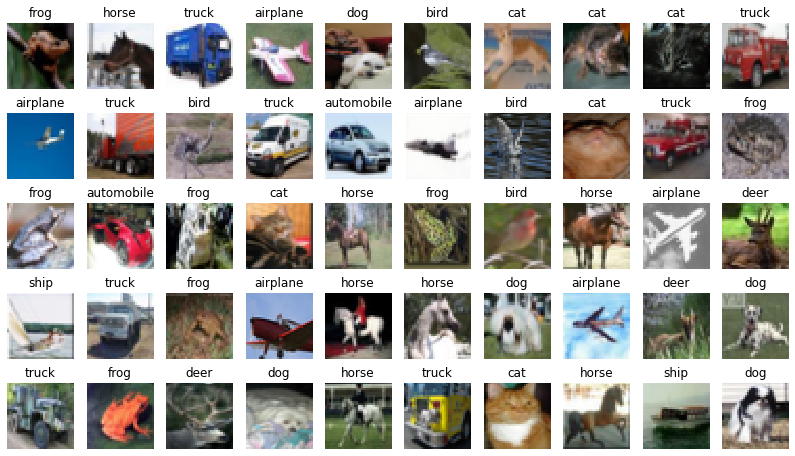

In [184]:
#displaying sample of 50 images
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

In [185]:
#scaling the pixel values in [-.5,.5]
X_train = np.interp(X_train, (0, 255), (-0.5, 0.5))
X_valid = np.interp(X_valid, (0, 255), (-0.5, 0.5))
X_test = np.interp(X_test, (0, 255), (-0.5, 0.5))

In [ ]:
#model creation
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPool2D(pool_size=[2,2], padding='valid', strides=2),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPool2D(pool_size=(2,2), padding='valid', strides=2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation="softmax")])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
  
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  

Epoch 1/10
704/704 [==============================] - 17s 8ms/step - loss: 1.4821 - accuracy: 0.4568 - val_loss: 1.2516 - val_accuracy: 0.5826
Epoch 2/10
704/704 [==============================] - 6s 9ms/step - loss: 1.1102 - accuracy: 0.6034 - val_loss: 1.0115 - val_accuracy: 0.6530
Epoch 3/10
704/704 [==============================] - 5s 8ms/step - loss: 0.9528 - accuracy: 0.6584 - val_loss: 0.9453 - val_accuracy: 0.6822
Epoch 4/10
704/704 [==============================] - 5s 8ms/step - loss: 0.8457 - accuracy: 0.6974 - val_loss: 0.8418 - val_accuracy: 0.7156
Epoch 5/10
704/704 [==============================] - 5s 8ms/step - loss: 0.7714 - accuracy: 0.7260 - val_loss: 0.7914 - val_accuracy: 0.7396
Epoch 6/10
704/704 [==============================] - 5s 8ms/step - loss: 0.7060 - accuracy: 0.7494 - val_loss: 0.7773 - val_accuracy: 0.7344
Epoch 7/10
704/704 [==============================] - 6s 8ms/step - loss: 0.6540 - accuracy: 0.7700 - val_loss: 0.7334 - val_accuracy: 0.7494
Epoch

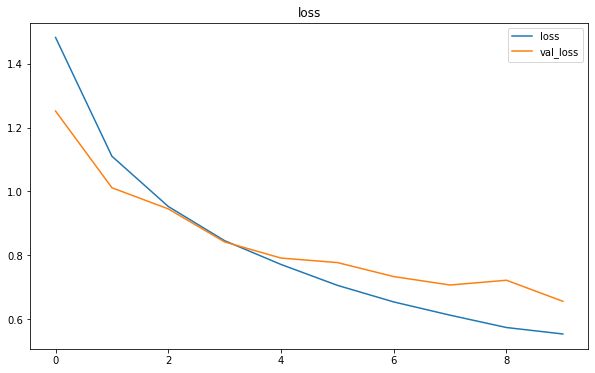

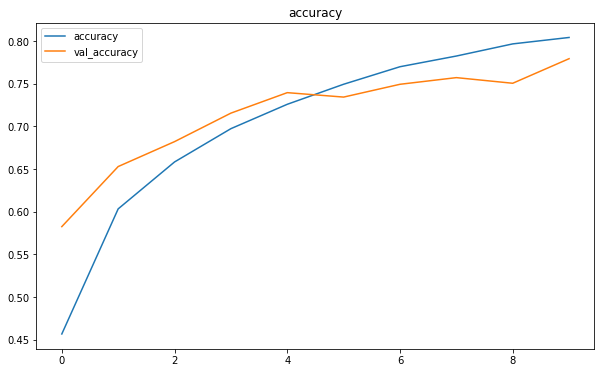

In [ ]:
#model training
history = model.fit(X_train, y_train, epochs= 10, batch_size= 64,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
#saving the model
save_model(model,"model.h5")

In [186]:
#loading the model
model = load_model("model.h5")

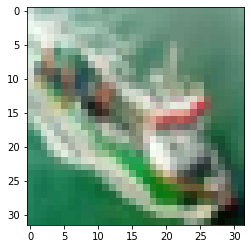

In [187]:
# random image
image = np.interp(X_test[15], (-0.5, 0.5), (0, 255))
image = image.reshape(32,32,3)
_ = plt.imshow((image).astype(np.uint8)) 

In [190]:
# high prediction score images
no_of_images = 3
collect_idx_high = []
for idx in range(len(X_test)):
  if len(collect_idx_high) == no_of_images:
    break
  prob = np.max(model.predict(X_test[idx].reshape(1, 32, 32, 3)))
  if np.argmax(model.predict(X_test[idx].reshape(1, 32, 32, 3))) == y_test[idx][0] and prob>=0.95:
    collect_idx_high.append(idx)
print(len(collect_idx_high))


3


In [191]:
collect_idx_high

[1, 4, 5]

In [192]:
for img in collect_idx_high:
  print("probability:",np.max(model.predict(X_test[img].reshape(1, 32, 32, 3))))
  print("predicted: {}, original: {}".format(np.argmax(model.predict(X_test[img].reshape(1, 32, 32, 3))),y_test[img][0]))


probability: 0.99232304
predicted: 8, original: 8
probability: 0.97902197
predicted: 6, original: 6
probability: 0.9597798
predicted: 6, original: 6


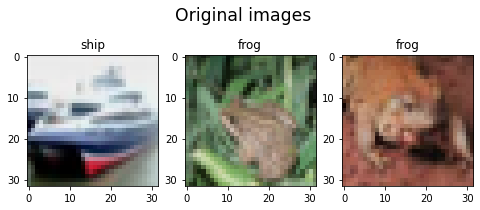

In [193]:
images = collect_idx_high
f, axarr = plt.subplots(1,3,figsize=(8,8))

# Display the image
f.suptitle('Original images', y=0.7, fontsize = "xx-large")
for img in range(len(collect_idx_high)):
  image = np.interp(X_test[collect_idx_high[img]], (-0.5, 0.5), (0, 255))
  image = image.reshape(32,32,3)
  axarr[img].imshow((image).astype(np.uint8))
  axarr[img].set_title(class_names[y_test[collect_idx_high[img]][0]])

In [194]:
# low prediction score images
collect_idx_med = []
for idx in range(len(X_test)):
  if len(collect_idx_med) == no_of_images:
    break
  prob = np.max(model.predict(X_test[idx].reshape(1, 32, 32, 3)))
  if np.argmax(model.predict(X_test[idx].reshape(1, 32, 32, 3))) == y_test[idx][0] and prob>=0.3 and prob<=0.5:
    collect_idx_med.append(idx)
print(len(collect_idx_med))

3


In [195]:
collect_idx_med

[0, 12, 20]

In [196]:
for img in collect_idx_med:
  print("probability:",np.max(model.predict(X_test[img].reshape(1, 32, 32, 3))))
  print("predicted: {}, original: {}".format(np.argmax(model.predict(X_test[img].reshape(1, 32, 32, 3))),y_test[img][0]))

probability: 0.466546
predicted: 3, original: 3
probability: 0.36062607
predicted: 5, original: 5
probability: 0.38092026
predicted: 7, original: 7


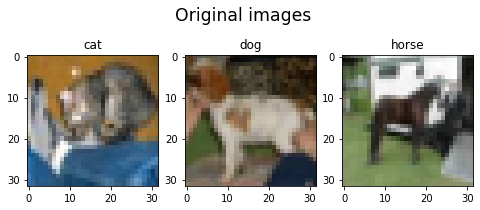

In [197]:
images = collect_idx_med
f, axarr = plt.subplots(1,no_of_images,figsize=(8,8))

# Display the image
f.suptitle('Original images', y=0.7, fontsize = "xx-large")
for img in range(len(collect_idx_med)):
  image = np.interp(X_test[collect_idx_med[img]], (-0.5, 0.5), (0, 255))
  image = image.reshape(32,32,3)
  axarr[img].imshow((image).astype(np.uint8))
  axarr[img].set_title(class_names[y_test[collect_idx_med[img]][0]])

In [198]:
collect_idx = collect_idx_high+collect_idx_med

In [199]:
collect_idx

[1, 4, 5, 0, 12, 20]

In [219]:
ID = 8  #if needed to train single image
q  = 10  #no of random directions
d = X_train[ID].size #image size
T = 1000 #no of iterations
mu = 0.01 #smoothing parameter
orig_image = X_test[ID].reshape(1, 32, 32, 3) #iamge of particular ID if needed to train single image
delta_sgd= 1e-2 #learning rate
delta_sign_sgd = 1e-2
delta_adam = 1e-2
const = 0.1 #lambda
tl = y_test[ID][0] #true label if needed to train single image
sign = True #factor deciding sgd or signsgd

In [220]:
def objective_f(orig_image, x, k, tl, const):
  modified_input = 0.5*np.tanh(x)/0.999999
  reshaped_image = np.resize(modified_input, orig_image.shape)
  prediction = model.predict(reshaped_image)
  max_score_t = prediction[0,tl]
  m = np.zeros(prediction.size, dtype=bool)
  m[tl] = True #to give the maximum value excluding the true class
  max_score_j = np.max(np.ma.array(prediction, mask=m)) #max score in the prediction array without considering the true class
  # loss_1 = const*(max(max_score_t - max_score_j, -k))
  loss_1 = const*(max(np.log(max_score_t+1e-10) - np.log(max_score_j+1e-10), -k))
  loss_2 =  np.linalg.norm(reshaped_image-orig_image)**2
  return loss_1 + loss_2, loss_1, loss_2


In [221]:
def grad_estimate(orig_image, x, mu, q, d, tl, const, k):

  m, sigma = 0, 100 # mean and standard deviation
  sum = 0
  f_origin = objective_f(orig_image, x, k, tl, const) #f_i(x)
  for i in range(q):
      u = np.random.normal(m, sigma, (1,d))
      u_norm = np.linalg.norm(u)
      u = u/u_norm
      sum += (objective_f(orig_image, x+mu*u, k, tl, const)[0]-f_origin[0])*u

  return (d*sum)/(mu*q)



In [222]:
def ZO_SignSGD(orig_image, delta, T, d, mu, q, tl, const, k=0, sign=False): #original image, learning_rate, number of iterations, flattened image dim, smoothing parameter, number of random directions, true label, lambda, confidence gap
  succ_iter = None
  succ_adv_image = None
  succ_distortion = None
  w = np.zeros((1,d))
  x_flattened = np.resize(orig_image, (1, d))
  w_ori_img_vec = np.arctanh(2 * (x_flattened) * 0.999999)
  x_clipped = np.arctanh(2 * (np.clip(x_flattened + w,-0.5,0.5)) * 0.999999) 
  attack_losses = []
  distortions = []
  orig_delta = delta
  adv_images_iterations = []
  predictions_iterations = []
  for iter in tqdm_notebook(range(T)):
    delta = orig_delta/np.sqrt(iter+1)
    _,loss1,loss2 = objective_f(orig_image, x_clipped, k, tl, const)
    attack_losses.append(loss1)
    distortions.append(loss2)
    g_k = grad_estimate(orig_image, x_clipped, mu, q, d, tl, const, k)
    if sign == True:
      g_k = np.sign(g_k)
    w = w - delta*g_k
    x_clipped = w_ori_img_vec + w
    #print(np.sum(np. isnan(x_clipped))
    adv_img_vec = 0.5 * np.tanh((x_clipped)) / 0.999999
    adv_img = np.reshape(adv_img_vec, orig_image.shape)

    prediction = model.predict(adv_img)
    max_score_t = prediction[0,tl]
    m = np.zeros(prediction.size, dtype=bool)
    m[tl] = True #to give the maximum value excluding the true class
    max_score_j = np.max(np.ma.array(prediction, mask=m))
    print(max(np.log(max_score_t+1e-10) - np.log(max_score_j+1e-10), -k),loss1,loss2)
    
    if max(np.log(max_score_t+1e-10) - np.log(max_score_j+1e-10), -k) == -k and succ_iter == None:
      succ_iter = iter
      succ_adv_image = adv_img
      succ_distortion = loss2
    
  final_distortion = loss2
  return np.argmax(prediction), adv_img, attack_losses, distortions, succ_iter, succ_adv_image, succ_distortion, final_distortion


In [223]:
def Zo_Adam(orig_image, delta, T, d, mu, q, tl, const, k=0): #original image, learning_rate, number of iterations, flattened image dim, smoothing parameter, number of random directions, true label, lambda, confidence gap
  succ_iter = None
  succ_adv_image = None
  succ_distortion = None
  w = np.zeros((1,d))
  x_flattened = np.resize(orig_image, (1, d))
  w_ori_img_vec = np.arctanh(2 * (x_flattened) * 0.999999)
  x_clipped = np.arctanh(2 * (np.clip(x_flattened + w,-0.5,0.5)) * 0.999999) 
  ## parameter initialization for AdaMM
  v_init = 1e-5 #0.00001
  v_hat = v_init * np.ones((1, d))
  v = v_init * np.ones((1, d))
  m = np.zeros((1, d))
  # momentum parameter for first and second order moment
  beta_1 = 0.9
  beta_2 = 0.3
  attack_losses = []
  distortions = []
  adv_images_iterations = []
  predictions_iterations = []
  orig_delta = delta
  for iter in tqdm_notebook(range(T)):
    delta = orig_delta/np.sqrt(iter+1)
    _,loss1,loss2 = objective_f(orig_image, x_clipped, k, tl, const)
    attack_losses.append(loss1)
    distortions.append(loss2)
    g_k = grad_estimate(orig_image, x_clipped, mu, q, d, tl, const, k)
    m = beta_1 * m + (1-beta_1) * g_k
    v = beta_2 * v + (1-beta_2) * np.square(g_k) ### vt
    v_hat = np.maximum(v_hat,v)
    #print(np.mean(v_hat))
    w = w - delta * m /np.sqrt(v_hat)
    x_clipped = w_ori_img_vec + w
    #print(np.sum(np. isnan(x_clipped))
    adv_img_vec = 0.5 * np.tanh((x_clipped)) / 0.999999
    adv_img = np.reshape(adv_img_vec, orig_image.shape)
    prediction = model.predict(adv_img)
    max_score_t = prediction[0,tl]
    mask = np.zeros(prediction.size, dtype=bool)
    mask[tl] = True #to give the maximum value excluding the true class
    max_score_j = np.max(np.ma.array(prediction, mask=mask))
    print(max(np.log(max_score_t+1e-10) - np.log(max_score_j+1e-10), -k),loss1,loss2)

    if max(np.log(max_score_t+1e-10) - np.log(max_score_j+1e-10), -k) == -k and succ_iter == None:
      succ_iter = iter
      succ_adv_image = adv_img
      succ_distortion = loss2
    
  final_distortion = loss2
  return np.argmax(model.predict(adv_img)), adv_img , attack_losses, distortions, succ_iter, succ_adv_image, succ_distortion, final_distortion



In [215]:
#sgd for single image
prediction, adv_image, attack_loss, distortions, succ_iter, succ_adv_image, succ_distortion, final_distortion = ZO_SignSGD(orig_image, delta_sgd, T, d, mu, q, tl, const, 0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1.7195582021933418 0.1757788418230371 5.6111893698083655e-31
1.7002408291019016 0.1719558202193342 0.002108219484570144
1.690106602897411 0.17002408291019017 0.0027817039127078914
1.671634226707487 0.1690106602897411 0.003155912685833697
1.6577203369894644 0.1671634226707487 0.0036733430831724263
1.6493750236710576 0.16577203369894644 0.0040069917715505506
1.643197247161685 0.16493750236710578 0.0041775636373214435
1.635406486008672 0.1643197247161685 0.0043032217174388
1.6258871175449308 0.1635406486008672 0.004425157527292587
1.6202583375160589 0.16258871175449308 0.004653730107047654
1.6157603230037998 0.1620258337516059 0.004798845054215295
1.6060497926370771 0.16157603230037998 0.004845658094932863
1.5994427482856368 0.16060497926370773 0.005018284702696033
1.5847211524142617 0.1599442748285637 0.00511273174430323
1.5782136148561625 0.15847211524142618 0.005327603744068866
1.5676283489107514 0.15782136148561626 0.005420005955485799
1.5627279831566456 0.15676283489107515 0.00560716

1.167035794518368 0.11695620875950655 0.010314606204901901
1.16590804227536 0.1167035794518368 0.010355146881394177
1.1636054364632422 0.11659080422753601 0.010365845498514568
1.1618444730327875 0.11636054364632423 0.010397112160809116
1.160038225693071 0.11618444730327876 0.010407255688881805
1.1581193829672434 0.11600382256930711 0.010425684459502866
1.1574391816699956 0.11581193829672434 0.010450330114473402
1.155211851321348 0.11574391816699957 0.010463012041705355
1.154598699826435 0.11552118513213482 0.010478957060195438
1.1540312128802233 0.11545986998264351 0.010485074232923662
1.1524152456287715 0.11540312128802233 0.010490015333373315
1.1513564315446438 0.11524152456287716 0.010493788602405671
1.1501133242002395 0.1151356431544644 0.010506145411130414
1.1488130080502856 0.11501133242002395 0.010509127190717097
1.147512424722374 0.11488130080502856 0.010531523533763404
1.1458587656980195 0.1147512424722374 0.010545493461193484
1.1449494250906922 0.11458587656980196 0.010564233

1.03652666947547 0.10375313739549115 0.011865847144409105
1.035511676190255 0.103652666947547 0.011886771718554836
1.0351021256002162 0.1035511676190255 0.01190371040757816
1.0345430914605465 0.10351021256002163 0.01190509959808815
1.034289072951156 0.10345430914605465 0.011910449001572102
1.033764855833812 0.10342890729511561 0.011914802798002676
1.0324587699266048 0.1033764855833812 0.011919379710895543
1.0320632402478904 0.10324587699266048 0.011943380539867952
1.031464356873756 0.10320632402478905 0.011944100235145645
1.0302283915536585 0.10314643568737561 0.011951903188994162
1.0295296022288691 0.10302283915536586 0.011963615589704848
1.0285816158840173 0.10295296022288691 0.01197704563543094
1.0274488668032826 0.10285816158840173 0.011989361279809266
1.0269856407182467 0.10274488668032827 0.012020616362641717
1.026394911175484 0.10269856407182468 0.012028957876099344
1.025950922066515 0.1026394911175484 0.012034597784315032
1.0256316891630237 0.10259509220665151 0.012040524124160

0.9463650630456306 0.09479501167395159 0.013223059858273342
0.9456084272279156 0.09463650630456306 0.013239039609543602
0.944957205366665 0.09456084272279157 0.013255757257464418
0.9442593999412089 0.09449572053666651 0.013262791939809147
0.9439783021697797 0.0944259399941209 0.013269657048705379
0.943171314286983 0.09439783021697798 0.013272258873053127
0.942818649181062 0.0943171314286983 0.013282528603063528
0.9425170427707219 0.0942818649181062 0.013286284750069498
0.9419610757415847 0.09425170427707219 0.01329602506183044
0.9412346127208332 0.09419610757415847 0.013307098276692252
0.9409611771392714 0.09412346127208332 0.013323068776850517
0.9400134399370743 0.09409611771392715 0.013325722939228388
0.939690830883926 0.09400134399370744 0.013337404424259222
0.9391519636055254 0.09396908308839261 0.013337492901500292
0.9383428294295358 0.09391519636055255 0.013345001914044783
0.9379217570391586 0.0938342829429536 0.013357314500657675
0.9373529544221795 0.09379217570391586 0.01334560

0.8725604767708159 0.08733033738302798 0.01436882398059046
0.8721895315226474 0.0872560476770816 0.014378008855391354
0.8715587052506264 0.08721895315226474 0.014382933393783782
0.8708629810530559 0.08715587052506264 0.014395547794968652
0.870514187755462 0.0870862981053056 0.014406931353441507
0.8699729323637837 0.0870514187755462 0.014413377358771804
0.8695933224775326 0.08699729323637838 0.014418977118386831
0.869149674181905 0.08695933224775326 0.014424451161324885
0.8688869299046343 0.0869149674181905 0.014433971563239724
0.8683385983900735 0.08688869299046344 0.014439208903191687
0.8680596394146758 0.08683385983900736 0.014448295719620967
0.8671216922643277 0.08680596394146758 0.014448522625047715
0.8668660537614944 0.08671216922643277 0.014465710521763079
0.866421006140833 0.08668660537614944 0.014468955328190107
0.8659474955830441 0.0866421006140833 0.014474716160393074
0.865460145923249 0.08659474955830442 0.01447609572407362
0.8646869522423017 0.08654601459232492 0.0144843171

0.8172028029990656 0.08177714757810615 0.015413455301083833
0.8167243174893417 0.08172028029990656 0.015424790639758369
0.8163616841320469 0.08167243174893418 0.015439245723039249
0.8161227441889478 0.0816361684132047 0.015451302318139527
0.8157109759745693 0.08161227441889479 0.015457967128075982
0.8154353604638587 0.08157109759745694 0.015471319388065632
0.8151235807690866 0.08154353604638587 0.015477082036365546
0.8148910988354419 0.08151235807690867 0.015483796794465227
0.8144962434270082 0.08148910988354419 0.015487090631118581
0.8139796164157848 0.08144962434270082 0.015494202030594682
0.8138546685667521 0.08139796164157848 0.015502653784156162
0.8135526279682471 0.08138546685667522 0.015507010000843511
0.8133666452368239 0.08135526279682471 0.015512959902502812
0.8132054718911886 0.08133666452368239 0.015511950738893622
0.8128533383124158 0.08132054718911887 0.015514487234929398
0.8121940966234644 0.08128533383124159 0.01552122554663043
0.8116841071407719 0.08121940966234645 0.0

0.7774007095394454 0.07778244073551685 0.01621255390884711
0.7771890675996485 0.07774007095394454 0.016223826506491533
0.776987027532912 0.07771890675996485 0.01622790370934919
0.7767381704919356 0.07769870275329122 0.016230695235082075
0.7766749780156577 0.07767381704919357 0.01624252829883911
0.7764482582453133 0.07766749780156577 0.016241790529318914
0.7761259604448388 0.07764482582453133 0.01624587021107509
0.7759191547750053 0.0776125960444839 0.016254302890966636
0.7757167745486588 0.07759191547750054 0.016258328114238406
0.7754895361016223 0.07757167745486589 0.016267340316730956
0.7750842777480754 0.07754895361016223 0.016271562703412165
0.7750223078921097 0.07750842777480754 0.016280533356592707
0.7747900166130395 0.07750223078921098 0.01628025702155795
0.7745830988936363 0.07747900166130395 0.016285745624058687
0.7744622512054062 0.07745830988936364 0.01628748890210857
0.7743866876929814 0.07744622512054063 0.01628816442049644
0.7742866915751616 0.07743866876929814 0.01628827

0.7454290080539198 0.07456646019598984 0.01687689095715422
0.7453625307296244 0.07454290080539198 0.01687868066970606
0.745112159216075 0.07453625307296245 0.016879759267604006
0.7450573775189098 0.0745112159216075 0.016883782375926932
0.7446077158049567 0.07450573775189098 0.016884521142315083
0.74445792504956 0.07446077158049567 0.016894400104110373
0.7441174656399777 0.074445792504956 0.01689575925939808
0.7436568820010807 0.07441174656399778 0.016899416298686777
0.7436308568659209 0.07436568820010807 0.016908904395619706
0.7434580331239776 0.0743630856865921 0.01690807373395392
0.7432327724587638 0.07434580331239776 0.016913499672690922
0.7429373328668765 0.07432327724587638 0.016918793591426156
0.7429012821875949 0.07429373328668765 0.01692707296716237
0.7427244258982324 0.0742901282187595 0.01692676913195012
0.7426528695115021 0.07427244258982324 0.0169306958634236
0.7420904170818892 0.07426528695115021 0.016930899352316033
0.7420022539580887 0.07420904170818891 0.016940539519218

In [216]:
#signsgd for signle image
prediction1, adv_image1, attack_loss1, distortions1, succ_iter1, succ_adv_image1, succ_distortion1, final_distortion1 = ZO_SignSGD(orig_image, delta_sign_sgd, T, d, mu, q, tl, const, 0, sign)

  0%|          | 0/1000 [00:00<?, ?it/s]

1.6508004030241397 0.1757788418230371 5.6111893698083655e-31
1.5575363651551346 0.16508004030241397 0.054591765024589414
1.5268470953531055 0.15575363651551347 0.07947280959753229
1.4707753868846074 0.15268470953531055 0.09805795966398463
1.3951422664227648 0.14707753868846074 0.10992898361736557
1.3657304883791812 0.1395142266422765 0.12100021993737863
1.3293165826922704 0.13657304883791813 0.12978133685033483
1.3050634785343997 0.13293165826922704 0.13791974956109201
1.2728157295633769 0.13050634785343998 0.14168271836412186
1.2433102083224603 0.12728157295633769 0.14557810223693232
1.2082681191856492 0.12433102083224604 0.14904114309134434
1.1653444678582359 0.12082681191856492 0.152736107029032
1.1531138465941604 0.11653444678582359 0.15558348141062966
1.1302129726129801 0.11531138465941604 0.15892285998577882
1.117006536436242 0.11302129726129802 0.16287234591099312
1.0955688853359635 0.1117006536436242 0.16497727500092016
1.0726182413366394 0.10955688853359635 0.1674221550931674


0.39733203445619625 0.03989279805288226 0.18375976725757404
0.39335751386443485 0.039733203445619626 0.18334709700166646
0.3902764199914944 0.03933575138644349 0.18324661060130232
0.38459043031613027 0.039027641999149446 0.18313143924068068
0.3837485453449906 0.03845904303161303 0.18296514253359528
0.38145705556981047 0.03837485453449906 0.18303071767871654
0.3823931170078765 0.03814570555698105 0.18262019878220534
0.3823340429728158 0.03823931170078765 0.18233713972214283
0.3788323196129312 0.03823340429728159 0.18207105243176724
0.37576796063262596 0.03788323196129312 0.18203355790679196
0.37288028405107276 0.0375767960632626 0.1820775030608899
0.37337278523633877 0.037288028405107275 0.18184963246312993
0.37313054176225513 0.03733727852363388 0.18167023279478223
0.37168839170281265 0.03731305417622551 0.18133451056147398
0.3698994935197799 0.03716883917028126 0.18125520694480443
0.3688051341731138 0.03698994935197799 0.18089345068383042
0.36365823401039477 0.03688051341731138 0.1806

0.18711445735636134 0.019087557749241382 0.1617467979327228
0.18631151268549473 0.018711445735636136 0.16198795134635915
0.18820119665029522 0.018631151268549473 0.161833139207883
0.19015528464659914 0.018820119665029524 0.16167857692870108
0.1870892245981074 0.019015528464659915 0.1615992017018352
0.18206740640248753 0.01870892245981074 0.1616373273565306
0.18317385589061286 0.018206740640248752 0.1619806795057717
0.18230770546247765 0.018317385589061288 0.16170446853245318
0.18272522267209634 0.018230770546247766 0.16165095274092586
0.1802696599174608 0.018272522267209636 0.16136101374279369
0.1805307358827991 0.01802696599174608 0.16125225298969853
0.1784234275512736 0.01805307358827991 0.16084885673746102
0.17709895991567126 0.01784234275512736 0.16070037773336376
0.17482427041652404 0.017709895991567127 0.1607209705543396
0.17483286745826987 0.017482427041652406 0.16045571520885635
0.17265486113162776 0.017483286745826988 0.16035512210423838
0.1687035809533881 0.017265486113162778

0.09138127105056126 0.00910922996244421 0.14070146207737438
0.09279604978232658 0.009138127105056126 0.14053951791686042
0.09339093783833319 0.009279604978232658 0.14044361869678013
0.09145333601372374 0.009339093783833319 0.14037636134337386
0.0913627253050715 0.009145333601372374 0.14037396151868214
0.0908425102904803 0.009136272530507151 0.1402580966807529
0.09063095333968108 0.00908425102904803 0.14017105779524736
0.09036464996658056 0.009063095333968109 0.1400360043077341
0.0897197671585187 0.009036464996658056 0.13979606112486476
0.09021495898549192 0.00897197671585187 0.13983609992610796
0.08934115159890521 0.009021495898549193 0.13954008719705824
0.08888894588247431 0.008934115159890522 0.13952208341309008
0.08911725846954477 0.008888894588247431 0.13946990382981703
0.08823107078781078 0.008911725846954478 0.13928030822727025
0.08780554032430143 0.008823107078781079 0.1391060363201602
0.0873103149508343 0.008780554032430143 0.13895483379630474
0.08791898796983488 0.008731031495

0.028571886500389887 0.003038004995719712 0.1242020911802098
0.026997323041701327 0.002857188650038989 0.12398259800829287
0.02685478382221973 0.002699732304170133 0.12384757441235611
0.026124035971900383 0.002685478382221973 0.12375179151248102
0.024774578365347688 0.0026124035971900384 0.12371680533999156
0.024144406726404277 0.002477457836534769 0.1235053909492683
0.02463605288913473 0.002414440672640428 0.12337968195428634
0.025850475363699887 0.0024636052889134732 0.1232319426729599
0.025290264549189256 0.002585047536369989 0.12299086259667437
0.025182900237912254 0.0025290264549189256 0.12292766207662349
0.023738656400453584 0.0025182900237912254 0.12295415617664959
0.02357028688088847 0.0023738656400453585 0.1229231062445447
0.023414913015010086 0.002357028688088847 0.12274862872308341
0.022845271945557633 0.002341491301501009 0.12274530744537591
0.022028682187143822 0.002284527194555763 0.12259512600897222
0.02182341916747177 0.0022028682187143823 0.12255887884113574
0.02215272

0.0008304250304900229 0.00015161189075521 0.11115459144177228
0.000339780154116065 8.30425030490023e-05 0.11122089072024585
0.00034571807463357196 3.39780154116065e-05 0.11120988894922344
0.0014295893892217748 3.4571807463357196e-05 0.11110936438506393
0.0009329567412876827 0.0001429589389221775 0.1109033976753496
0.0004922954621806586 9.329567412876828e-05 0.11079607822341557
0 4.922954621806586e-05 0.11081634320643852
0 0.0 0.1109391018604774
0.0006888083527343269 0.0 0.11083527275835617
0 6.88808352734327e-05 0.11066219894575585
0.0010636548472466867 0.0 0.1107203842404885
2.072451842560774e-05 0.00010636548472466868 0.11047232403792416
0.0008521193006292282 2.072451842560774e-06 0.11048440312454308
0.0009259947844122429 8.521193006292283e-05 0.11028756213669158
0.0012261928011711998 9.25994784412243e-05 0.1101211905713573
0.0003979197836536663 0.00012261928011711998 0.11005272092673012
0.0009505334201607152 3.979197836536663e-05 0.11014031410101487
0 9.505334201607152e-05 0.1099619

0.0035362304327173355 0.00022819164686453954 0.09960296287888352
0.0034198920465984273 0.0003536230432717336 0.09950242098649399
0.004016924929319821 0.00034198920465984274 0.09941187273271918
0.0040924430714111 0.00040169249293198206 0.09926486047236245
0.0028672422738573733 0.0004092443071411101 0.0991173607288281
0.002162481720329179 0.00028672422738573733 0.09911962576880526
0.003500703226348101 0.0002162481720329179 0.09909426940875853
0.002533919669353235 0.0003500703226348101 0.09900354650320596
0.0024199268882119096 0.00025339196693532353 0.09911487472595147
0.001798143873067426 0.00024199268882119096 0.09914208640205449
0.0015237932381262365 0.0001798143873067426 0.09911678190401471
0.0008494960750482505 0.00015237932381262365 0.0990257965183631
0.0013183966497416488 8.494960750482505e-05 0.09895634489101271
0.0015323349239624307 0.0001318396649741649 0.09883702597617106
0.0034811591519403606 0.00015323349239624307 0.09874773348333817
0.0019438035026684286 0.000348115915194036

0 4.396612041741577e-05 0.09137953039957437
0.0015571596470729254 0.0 0.09134265666514257
0.0015573491982165955 0.00015571596470729255 0.09110998967017937
0.0020091727819187 0.00015573491982165955 0.0910196663957758
0.0018997624095429266 0.00020091727819187 0.09089058948449978
0.0001526015282418136 0.00018997624095429266 0.09088079090811128
0.0006668721917573173 1.5260152824181362e-05 0.09097574674364935
0 6.668721917573173e-05 0.09093237132007063
0 0.0 0.09095696731019534
0 0.0 0.09105907028156955
5.909525820979589e-05 0.0 0.09088135756451002
0.0001221043588632842 5.909525820979589e-06 0.09077077865008046
0.001859681188971063 1.221043588632842e-05 0.09070294652379307
0.002420196624833615 0.0001859681188971063 0.0905728602330763
0.001768582006690389 0.0002420196624833615 0.09045272513955496
0.0007281353677925928 0.0001768582006690389 0.09039578059312532


In [217]:
#Adam for signle image
prediction2, adv_image2, attack_loss2, distortions2, succ_iter2, succ_adv_image2, succ_distortion2, final_distortion2 = Zo_Adam(orig_image, delta_adam, T, d, mu, q, tl, const, k=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1.7416596758584375 0.1757788418230371 5.6111893698083655e-31
1.723159498778918 0.17416596758584377 0.0007661389989795128
1.7021067007234791 0.1723159498778918 0.0019282776536492362
1.6800787169492197 0.1702106700723479 0.0031651390374399274
1.659864466271511 0.16800787169492198 0.004513265646814579
1.6385118460847863 0.16598644662715112 0.005902739056945273
1.617230655105525 0.16385118460847864 0.007277720300389367
1.597171753906553 0.16172306551055252 0.008631822026130687
1.579633664324715 0.15971717539065533 0.010002652007627186
1.5623185093055827 0.15796336643247152 0.011362505342623624
1.5458886586291811 0.15623185093055827 0.012688915150103664
1.5282967240266174 0.15458886586291812 0.013954633060946579
1.5102164651073695 0.15282967240266176 0.0151237537805484
1.493056066624976 0.15102164651073696 0.016290259619344168
1.4769369881161232 0.1493056066624976 0.017418317483273386
1.460748922468535 0.14769369881161232 0.01849419195921459
1.4457804719093204 0.14607489224685352 0.01953074

0.7762148750042636 0.0777805797589592 0.04112157035901479
0.7746278743853535 0.07762148750042636 0.04113016158391443
0.7729799712528386 0.07746278743853535 0.04113285433190206
0.7714402843183129 0.07729799712528386 0.041142067595643914
0.7697722931763342 0.0771440284318313 0.041152250076676854
0.7681408201333046 0.07697722931763343 0.04116345730298528
0.7663869955046695 0.07681408201333047 0.04117110751745471
0.7644786753369807 0.07663869955046695 0.041183451392170126
0.7626111208151218 0.07644786753369807 0.04118966232730453
0.7607729111568845 0.07626111208151219 0.04119513738855538
0.7590653991454638 0.07607729111568845 0.04120417593464275
0.757231468495226 0.07590653991454638 0.04121742319997465
0.7555349040237545 0.07572314684952261 0.041234201910759966
0.7539436613774979 0.07555349040237545 0.041249718357959285
0.7522184864748476 0.0753943661377498 0.04126549736322241
0.7504253628378083 0.07522184864748477 0.04128094491744403
0.7487473840448992 0.07504253628378083 0.04129560533158

0.5997963106554723 0.060055857248234756 0.04215394753865236
0.5989935188122599 0.05997963106554724 0.04216150640111191
0.5981760317265199 0.059899351881226 0.04217127751676358
0.5973823423731243 0.059817603172651994 0.04217943565682137
0.5965526744704376 0.05973823423731243 0.04218493702317481
0.5956465257401915 0.05965526744704376 0.042191990462059646
0.5947645188627958 0.059564652574019154 0.04220274107460228
0.5938722676288716 0.059476451886279584 0.04221244197303648
0.5929715801838625 0.05938722676288716 0.042224127579501086
0.5921132857740182 0.05929715801838625 0.042233017216397106
0.5911404902623485 0.05921132857740183 0.04224273152209376
0.5901962831337706 0.05911404902623485 0.042257699121530795
0.5892779656051025 0.059019628313377065 0.04227515256455788
0.588400800449791 0.058927796560510254 0.04228643852803243
0.5875098309115936 0.05884008004497911 0.04229686011421695
0.5866382355608452 0.058750983091159364 0.0423057048871789
0.5857574922172639 0.058663823556084516 0.0423124

0.48923702309251216 0.04899451918541731 0.043192445620928756
0.488517030068809 0.04892370230925122 0.04320415171855774
0.48788095978511636 0.0488517030068809 0.04321112950777685
0.48731351947932733 0.048788095978511636 0.043215312495380305
0.48681622018840676 0.04873135194793274 0.04321902636034843
0.48629836935818227 0.04868162201884068 0.04321533325177286
0.485800241155654 0.04862983693581823 0.043211487728777795
0.4852960213322106 0.048580024115565404 0.043208501108935975
0.4847708130526377 0.048529602133221064 0.043203235973193276
0.484246033282389 0.04847708130526377 0.043200847315070595
0.48366808556602525 0.048424603328238905 0.04319953523691954
0.48309728760921566 0.048366808556602525 0.04319993042812866
0.4825167885576951 0.04830972876092157 0.04320114337113376
0.4818982729386341 0.04825167885576951 0.04320383346638376
0.4813003392162154 0.04818982729386341 0.04320819979671457
0.4806902369434788 0.048130033921621546 0.04321152509237152
0.48003478935778643 0.04806902369434788 0

0.41894601175554314 0.04193863009460226 0.043564878173879
0.41853645390375105 0.04189460117555432 0.043566847936332066
0.4181380085319719 0.04185364539037511 0.04356617881707592
0.41772028436083 0.04181380085319719 0.04356599482766558
0.4172962293183118 0.041772028436083 0.04356583882449107
0.4168651340340581 0.04172962293183118 0.043565735885875985
0.41645932525649887 0.04168651340340582 0.043565661454767216
0.41603826926526954 0.04164593252564989 0.043565974206320905
0.41556189815687417 0.041603826926526956 0.043563566950455795
0.4150873847745613 0.04155618981568742 0.04356339641253799
0.41460964959342794 0.041508738477456134 0.043565132296043835
0.41416307571397915 0.041460964959342796 0.04356907033399928
0.4137056060787204 0.041416307571397915 0.04357089086175207
0.4132707498882343 0.041370560607872045 0.043574249835731604
0.41280106059092914 0.04132707498882343 0.04357718039718791
0.41229271223775943 0.041280106059092915 0.043580968346712975
0.4117892186544565 0.04122927122377595 

0.3612992932314353 0.03616158530452843 0.043838988725214224
0.3609875906859632 0.03612992932314353 0.043841656738623384
0.3606679272392307 0.036098759068596324 0.043844036436192946
0.36036563841885183 0.03606679272392307 0.04384711128027914
0.35995748242818515 0.03603656384188519 0.043849498270923784
0.3595364070634234 0.035995748242818516 0.04385428387625809
0.35912278525759056 0.03595364070634234 0.043858427738948096
0.3587536412125212 0.03591227852575906 0.0438623562927288
0.3584112964601217 0.03587536412125212 0.04386412011283004
0.3580658715916608 0.035841129646012174 0.043865109578982486
0.3576796623752755 0.035806587159166084 0.043868115698455175
0.3572780498752167 0.03576796623752755 0.04387461295222536
0.35688279985690363 0.03572780498752167 0.04388099714292364
0.3564889126740671 0.035688279985690366 0.04388773339235065
0.3561088858862347 0.03564889126740672 0.04389486787405996
0.35574817245428403 0.03561088858862347 0.04390155832822472
0.35537955991212955 0.0355748172454284 0

0.3144505371882981 0.03146910686136724 0.044282101752475635
0.3141481967197839 0.03144505371882981 0.044285268173548206
0.31385276429625564 0.03141481967197839 0.0442916752521711
0.3135736159762693 0.03138527642962557 0.044298894299240325
0.313306123737332 0.031357361597626934 0.044305914537410715
0.313039725898969 0.031330612373733205 0.04431171441691424
0.31275159135118613 0.0313039725898969 0.04431777254105989
0.31246567201151654 0.031275159135118615 0.044324979139549324
0.31216761143720906 0.031246567201151654 0.04433113085276241
0.3118825471236941 0.031216761143720906 0.044338205200726184
0.3115773027212222 0.031188254712369412 0.044344473322526355
0.31128216544529064 0.031157730272122222 0.044348916093243644
0.3109508146259984 0.031128216544529064 0.0443528390885298
0.31061630071553503 0.03109508146259984 0.044358178471997585
0.31029728139683244 0.031061630071553506 0.04436394482282421
0.3099916688341642 0.031029728139683244 0.0443705901201518
0.30966972654336244 0.03099916688341

0.2796627959832335 0.027985764320696327 0.04451930185976544
0.27947499621318805 0.027966279598323353 0.04452129441704499
0.27928973214523123 0.027947499621318806 0.04452245895054024
0.2791168659312857 0.027928973214523124 0.04452289446928295
0.2789476680926458 0.027911686593128572 0.04452221840268936
0.2787602028304518 0.027894766809264584 0.04452143856493171
0.27852987859811984 0.02787602028304518 0.04452168581064553
0.2783164507563338 0.027852987859811985 0.04452248362427533
0.2780967214731034 0.027831645075633384 0.0445218819366074
0.27788233993926803 0.027809672147310338 0.04452065436090613
0.27766754406610006 0.027788233993926804 0.0445191280222759
0.2774627928297271 0.027766754406610007 0.04451831457130696
0.2772240703270231 0.02774627928297271 0.04451811839337578
0.2769851110816772 0.027722407032702314 0.04451878340466294
0.2767484452279888 0.027698511108167723 0.04452019258348876
0.276499484010564 0.02767484452279888 0.044521567499085736
0.2762603776496838 0.027649948401056404 

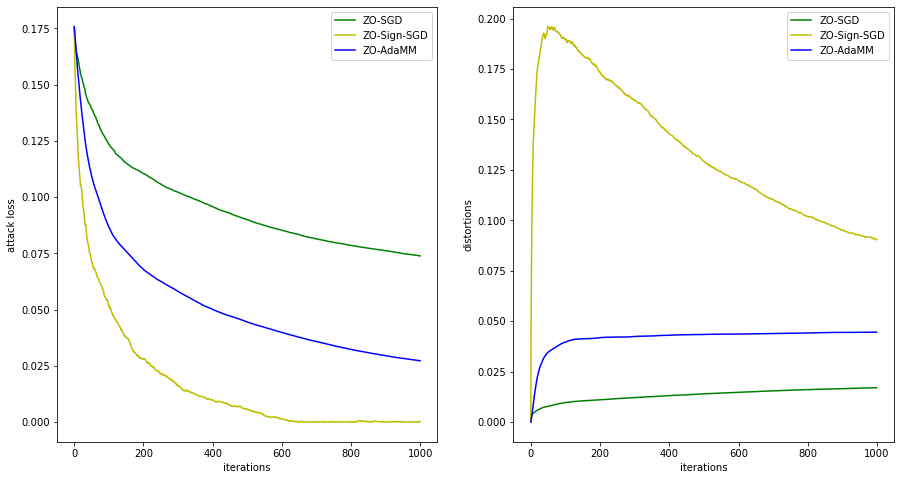

In [218]:
#plot of attack loss and distortion vs iterations for single image
f, axarr = plt.subplots(1,2,figsize=(15,8))

axarr[0].plot(range(len(attack_loss)),attack_loss, 'g', label='ZO-SGD')
# axarr[0].plot(succ_iter, attack_loss[succ_iter], marker = "s", markersize= 9)
axarr[0].plot(range(len(attack_loss1)),attack_loss1, 'y', label='ZO-Sign-SGD')
# axarr[0].plot(succ_iter1, attack_loss1[succ_iter1], marker = "*", markersize= 9) 
axarr[0].plot(range(len(attack_loss2)),attack_loss2, 'b', label='ZO-AdaMM')
# axarr[0].plot(succ_iter2, attack_loss2[succ_iter2], marker = "d") 
axarr[0].legend(loc="upper right")
axarr[0].set_xlabel('iterations')
axarr[0].set_ylabel('attack loss')


axarr[1].plot(range(len(distortions)),distortions, 'g', label='ZO-SGD')
# axarr[1].plot(succ_iter, distortions[succ_iter], marker = "s")
axarr[1].plot(range(len(distortions1)),distortions1, 'y', label='ZO-Sign-SGD')
# axarr[1].plot(succ_iter1, distortions1[succ_iter1], marker = "*")
axarr[1].plot(range(len(distortions2)),distortions2, 'b', label='ZO-AdaMM')
# axarr[1].plot(succ_iter2, distortions2[succ_iter2], marker = "d")
axarr[1].legend(loc="upper right")
axarr[1].set_xlabel('iterations')
_ = axarr[1].set_ylabel('distortions')

In [225]:
#SGD for 6 images
final_prediction_sgd = []
final_adv_image_sgd = []
attack_losses_sgd = []
all_distortions_sgd = []
succ_iter_number_sgd = []
succ_adv_images_sgd = []
succ_distortion_sgd = []
final_distortion_sgd = []
for idx in collect_idx:
  prediction, adv_image, attack_loss, distortions, succ_iter, succ_adv_image, succ_distortion, final_distortion = ZO_SignSGD(X_test[idx].reshape(1, 32, 32, 3), delta_sgd, T, d, mu, q, y_test[idx][0], const, 0,False)
  final_prediction_sgd.append(prediction)
  final_adv_image_sgd.append(adv_image)
  attack_losses_sgd.append(attack_loss)
  all_distortions_sgd.append(distortions)
  succ_iter_number_sgd.append(succ_iter)
  succ_adv_images_sgd.append(succ_adv_image)
  succ_distortion_sgd.append(succ_distortion)
  final_distortion_sgd.append(final_distortion)

  0%|          | 0/1000 [00:00<?, ?it/s]

5.293567147043858 0.5312518571017619 3.1742391172768587e-31
5.269060078945044 0.5293567147043858 0.0005983173107404364
5.246349829416431 0.5269060078945044 0.0011711200155705792
5.223005303804341 0.5246349829416431 0.001662447176470091
5.214591897298943 0.5223005303804341 0.0020595929922718496
5.196191724193434 0.5214591897298944 0.0021990758076543358
5.1806378675025 0.5196191724193434 0.0023933035289144685
5.171413396639238 0.51806378675025 0.002643651048552446
5.1634459552511345 0.5171413396639238 0.0027639673390735995
5.149943851249835 0.5163445955251135 0.0028630681748362343
5.142370607588829 0.5149943851249835 0.0030079049301281217
5.137022945562075 0.5142370607588829 0.0030673128131031187
5.12773418276636 0.5137022945562075 0.003138698364895132
5.112906907190296 0.512773418276636 0.0032265480901025817
5.099544974452091 0.5112906907190297 0.0033941509305359424
5.089945295410699 0.5099544974452092 0.0035541571339673286
5.0850772570827045 0.5089945295410699 0.003629369703664498
5.07

4.638974630530409 0.464094732813017 0.007225991798976951
4.636929875018006 0.46389746305304097 0.007238647924144705
4.633968368435383 0.4636929875018006 0.00726596570968251
4.632513952525595 0.46339683684353833 0.007281435269918624
4.630489270716989 0.4632513952525595 0.0072895892910916135
4.629324419099647 0.4630489270716989 0.007306131187011883
4.628716987855299 0.46293244190996474 0.0073159826962763885
4.627131954102986 0.4628716987855299 0.007315951882339071
4.625477832886699 0.46271319541029865 0.0073305936480493996
4.623141697619006 0.46254778328866997 0.007344485172150429
4.622318199959389 0.4623141697619006 0.0073634139584449485
4.620441405506201 0.462231819995939 0.007368336591341292
4.619646069019827 0.4620441405506201 0.007383022511496271
4.616177070707685 0.4619646069019827 0.0073932726814792075
4.613008505744014 0.4616177070707685 0.007419770039185118
4.611327160408126 0.46130085057440146 0.007443596346919888
4.6093568643141865 0.46113271604081263 0.007460506597884405
4.60

4.381574189220781 0.4383253046934047 0.00967810803407972
4.379545225827964 0.4381574189220781 0.009701335029028816
4.3766694442892655 0.4379545225827964 0.009732930065150552
4.3745884763185625 0.43766694442892656 0.009770763198523501
4.373621012152161 0.4374588476318563 0.009792191643520756
4.372887570485249 0.4373621012152161 0.009797891378848837
4.370936402641681 0.4372887570485249 0.009802461223136931
4.368869746394287 0.43709364026416814 0.009818578293586696
4.366770311431187 0.4368869746394287 0.00983418203496329
4.364146647634612 0.43667703114311873 0.009853009511261644
4.362841144567238 0.4364146647634612 0.009884445182900747
4.361246068699886 0.43628411445672377 0.009896069130898896
4.358867074068534 0.43612460686998866 0.00991064224742338
4.358261065876774 0.43588670740685337 0.009934457650045008
4.356058595842055 0.4358261065876774 0.009935781381466474
4.355162134460053 0.4356058595842055 0.009953557285619228
4.354488297241513 0.43551621344600533 0.009965861059207092
4.352903

4.171322769098252 0.41729130076883636 0.011869147113427084
4.1704916931027585 0.4171322769098252 0.011887525746244774
4.16971963927848 0.41704916931027586 0.011898694324984868
4.169038287207487 0.41697196392784797 0.011899361749064419
4.167647766846893 0.4169038287207487 0.011908344552437465
4.164207000492609 0.41676477668468936 0.011925081009872253
4.163194641475775 0.4164207000492609 0.011962288709167976
4.161753615914196 0.4163194641475775 0.011962548554127882
4.160219672239849 0.41617536159141966 0.011972322690914987
4.159301316853472 0.41602196722398493 0.01198742017486745
4.157654295006774 0.4159301316853472 0.012001175300520339
4.156608082991269 0.4157654295006774 0.012019665320334725
4.155981586221361 0.41566080829912694 0.012029644141177371
4.155081218779044 0.4155981586221361 0.012038736586574093
4.1533575491037364 0.4155081218779044 0.012054194202481782
4.152786269141891 0.41533575491037367 0.012073714785963937
4.152026605948552 0.4152786269141891 0.012080721382457608
4.1517

3.999743018217744 0.4001090526536853 0.013931412830552777
3.9983896722778 0.3999743018217744 0.013945913890273996
3.99683662398375 0.39983896722778 0.013955012381939103
3.9956793680677465 0.39968366239837505 0.013979571667705764
3.9950189844025146 0.39956793680677466 0.013998082805411725
3.9940700392997317 0.39950189844025147 0.014006800190060337
3.9920534767166864 0.3994070039299732 0.014019834606666625
3.9910516574425614 0.39920534767166865 0.01404939774409535
3.9899440032707463 0.39910516574425614 0.014067828220983004
3.9864068550367904 0.39899440032707467 0.014088484850107288
3.9852696262858727 0.39864068550367904 0.014140237050215266
3.9830212511186263 0.3985269626285873 0.014157382472718034
3.9821132908113936 0.39830212511186264 0.014180488753464678
3.98140902845285 0.3982113290811394 0.01419441304725408
3.980370977303893 0.398140902845285 0.014195014365332827
3.979168855824289 0.3980370977303893 0.01420862560628245
3.9771943269416643 0.3979168855824289 0.014221928249958563
3.975

3.8327545512125423 0.38353518884570337 0.016165696540582544
3.831839076559886 0.38327545512125427 0.016210166356922906
3.8309407068831645 0.38318390765598864 0.01622412467445377
3.8301234222143603 0.38309407068831647 0.01623824276402856
3.8293914214224305 0.38301234222143604 0.016249668371376837
3.8286871832697007 0.38293914214224306 0.016257837234800857
3.827579452583497 0.3828687183269701 0.01626324275652278
3.8266166910982804 0.3827579452583497 0.016283745115475198
3.8258762589092026 0.3826616691098281 0.016293108095214462
3.8249769014910595 0.38258762589092027 0.016304520212266662
3.8240002969326015 0.38249769014910595 0.016316093843644762
3.822999532201689 0.38240002969326015 0.016333743684635273
3.8221049138892464 0.38229995322016896 0.016345963204861168
3.8210421210872556 0.38221049138892466 0.01635607621862085
3.8197303168259116 0.3821042121087256 0.01637095088593324
3.819039393369548 0.38197303168259117 0.016390725212180157
3.816967040236869 0.3819039393369548 0.01640106702015

3.695351081509819 0.3696258495227453 0.01816003441321654
3.694380762068927 0.3695351081509819 0.018170689881727386
3.6935872902787135 0.36943807620689273 0.018184067922694926
3.6919589060394764 0.36935872902787137 0.018199279432321518
3.6914047613678247 0.36919589060394764 0.018229423305879847
3.69068855143543 0.36914047613678247 0.018238855922331144
3.6900868944907175 0.36906885514354304 0.018245458552708958
3.6886972541838485 0.3690086894490718 0.018250483356772738
3.6874080197055106 0.36886972541838486 0.01825949673908359
3.687038863877023 0.3687408019705511 0.018276441079964904
3.6860012514828395 0.36870388638770235 0.018280489405651797
3.6851535120253827 0.368600125148284 0.018296517680042763
3.6842441756466116 0.3685153512025383 0.01831071083836323
3.683786385017338 0.36842441756466116 0.01832241483201789
3.6829504939211843 0.3683786385017338 0.018324435139865335
3.681731201685139 0.36829504939211843 0.018337789032367168
3.680561523804465 0.3681731201685139 0.018353964636537934
3

3.5808233656941346 0.35813841864550805 0.01995046704930457
3.580263619215266 0.35808233656941346 0.019957375182286782
3.579187350987073 0.35802636192152665 0.01996839794084716
3.5782542071763066 0.3579187350987073 0.019986259735927152
3.5774559824311885 0.3578254207176307 0.01999102255463535
3.5767669510054083 0.35774559824311886 0.020004662320317786
3.5761895166510427 0.35767669510054084 0.020011107078339974
3.5755066680537144 0.35761895166510427 0.02002541254291296
3.574390838813707 0.35755066680537145 0.02003640081284022
3.573426737599494 0.35743908388137074 0.02004930891198147
3.572723862243966 0.35734267375994944 0.020065085235537496
3.5721178231345716 0.3572723862243966 0.02007434287703757
3.571421638529233 0.3572117823134572 0.020084987926624595
3.5709066742493314 0.3571421638529233 0.02010338031380416
3.5704407286985824 0.3570906674249332 0.020109777740883808
3.5691928766300394 0.3570440728698583 0.02011779947764472


  0%|          | 0/1000 [00:00<?, ?it/s]

4.490638695799605 0.4593128185685714 4.259822256193451e-31
4.335858750916091 0.44906386957996053 0.00627793587287646
4.297442877166913 0.4335858750916091 0.01290077653091392
4.273721255760255 0.42974428771669126 0.014379430850592878
4.23836993385607 0.4273721255760255 0.015157945847314575
4.181793146309115 0.42383699338560704 0.016123326109885636
4.157801148816808 0.4181793146309115 0.01771888087501585
4.100694679716299 0.4157801148816808 0.018403390702606916
4.064837947549174 0.4100694679716299 0.019625091163130007
4.027014182442352 0.4064837947549174 0.020404047706832625
4.007407158631197 0.4027014182442352 0.020977663356100493
3.966449698435734 0.4007407158631197 0.021210054563046855
3.926001548971041 0.39664496984357345 0.022075679077963466
3.895010869676275 0.3926001548971041 0.022979420867579897
3.87458753844648 0.38950108696762753 0.023502200717576954
3.8585572463073983 0.387458753844648 0.023973641364470815
3.8460488005021167 0.38585572463073986 0.024156579405227908
3.833651958

2.605863032850923 0.26106109907626296 0.040028511481061284
2.603332996550324 0.2605863032850923 0.040119645913358114
2.599217912481002 0.26033329965503244 0.04013045093048537
2.596471801993594 0.2599217912481002 0.04015082711555414
2.5936364949946205 0.2596471801993594 0.04018518125582271
2.5887885440878 0.25936364949946206 0.040213736061367356
2.5829367027947 0.25887885440878 0.04027375839945866
2.578653279075339 0.25829367027947 0.040347354724600534
2.56750208476641 0.2578653279075339 0.040423195605887544
2.561745130036828 0.25675020847664104 0.040627053355143564
2.5549111270485363 0.2561745130036828 0.040702509356374046
2.5510340407408423 0.25549111270485364 0.04077618700913278
2.5468029619167147 0.2551034040740842 0.04079422501593024
2.542907666710924 0.2546802961916715 0.04084199501274268
2.5382842373651484 0.2542907666710924 0.04090322855036201
2.534238289450132 0.2538284237365149 0.04094304387572962
2.5293912683192383 0.2534238289450132 0.04101195491907156
2.5255059731193237 0.2

2.0472931293025214 0.20495300887530898 0.047240272200501754
2.0399246071877997 0.20472931293025215 0.047295315436981095
2.037121272855364 0.20399246071877997 0.04738970678257004
2.0329542326188936 0.20371212728553642 0.04746616079658754
2.029945370243594 0.20329542326188937 0.047498871837395394
2.0277700029277694 0.20299453702435943 0.047578780164742575
2.0258460061562067 0.20277700029277695 0.047585012865319395
2.0205144738618444 0.20258460061562067 0.047574581071821255
2.016274402869766 0.20205144738618444 0.04762009956954691
2.0112814895119913 0.20162744028697663 0.04770324750598599
2.0085239518959206 0.20112814895119913 0.047825045655307465
2.003340232029306 0.20085239518959208 0.04787346935458325
2.0015167533170497 0.20033402320293062 0.04794800414653929
1.9996548035236468 0.20015167533170497 0.04797724159649963
1.9969415387487808 0.1999654803523647 0.0479793901273009
1.9909715788248714 0.1996941538748781 0.048022300321106735
1.9892082385490837 0.19909715788248716 0.04812670712290

1.656479336184196 0.16583061702910587 0.05328213149760917
1.655036433035171 0.16564793361841962 0.053319271786868426
1.6530609259119555 0.1655036433035171 0.05334516848119694
1.6498813876635288 0.16530609259119555 0.05336245882462714
1.6487031309137612 0.16498813876635288 0.0533907523336335
1.645118726343585 0.16487031309137612 0.05340694386885788
1.6413460337507568 0.1645118726343585 0.05345900799907156
1.6380281260539828 0.16413460337507568 0.05352861836908218
1.6353344742897105 0.1638028126053983 0.053625861525891806
1.633178233655225 0.16353344742897105 0.053667144365108985
1.6304158622465745 0.1633178233655225 0.053672507408398414
1.6273855658183103 0.16304158622465748 0.05375851229663437
1.625618948237832 0.16273855658183103 0.053806017777496794
1.6222091287187623 0.16256189482378322 0.05382998536832355
1.6193727789391934 0.16222091287187623 0.05388985416997377
1.6175332045425233 0.16193727789391935 0.05392542497294675
1.6142664220628913 0.16175332045425234 0.05395728585696999
1.

1.3908443468860532 0.1392066440044881 0.057576086972930256
1.3884501614324756 0.13908443468860532 0.057614709710688855
1.387201308247753 0.13884501614324757 0.05764844230546828
1.3842296620901817 0.1387201308247753 0.05767940202701438
1.382241697675319 0.13842296620901817 0.05774832269269814
1.3792247884628046 0.1382241697675319 0.057782329729675334
1.3775263695446052 0.13792247884628048 0.057830337751006745
1.376647935953862 0.13775263695446052 0.05786674091692226
1.3746642198693042 0.1376647935953862 0.05787872032056797
1.3722238932239366 0.13746642198693043 0.05791828452312969
1.3712663582125355 0.13722238932239367 0.05795315638046717
1.3704605486164547 0.13712663582125356 0.05796461466458922
1.369125401598068 0.13704605486164548 0.05796710545383144
1.3682008049893384 0.1369125401598068 0.05796952203689017
1.365208603408122 0.13682008049893385 0.057997200820544804
1.363655999538851 0.1365208603408122 0.058042298756965774
1.3624229795232483 0.1363655999538851 0.05807811192664414
1.35

1.1667671231433698 0.11676353856308985 0.06150319590804495
1.1656580005522992 0.11667671231433699 0.0615035849144452
1.1640572350546776 0.11656580005522993 0.06151511637618297
1.162474113217659 0.11640572350546777 0.06153331968030251
1.1610551319295346 0.11624741132176591 0.06154611926092026
1.159995063702144 0.11610551319295347 0.061569633111932184
1.1582555990572287 0.11599950637021439 0.0615831944016107
1.1557746343533153 0.11582555990572288 0.0616223677761179
1.153346031055859 0.11557746343533154 0.06162936476780766
1.1517338895196527 0.11533460310558591 0.0616819126384799
1.1506176001094546 0.11517338895196527 0.061697990617585546
1.1486534397501367 0.11506176001094547 0.06171849082957412
1.1471414893251493 0.11486534397501368 0.06176117138852883
1.1469569108352444 0.11471414893251493 0.061782511581212576
1.1447538981476872 0.11469569108352445 0.06178777062678358
1.143315753841704 0.11447538981476874 0.06182750967996277
1.1431588730930216 0.11433157538417041 0.06187196571869203
1.

0.9965958236833982 0.09973216029983423 0.06466248872360865
0.995501521835981 0.09965958236833983 0.06466423945855669
0.994958424746915 0.0995501521835981 0.06468058216638284
0.9941673908570342 0.09949584247469151 0.06468940386365218
0.9925728186518628 0.09941673908570342 0.06469337998183632
0.9905968119230191 0.09925728186518629 0.06473746043532867
0.9901308885369908 0.09905968119230191 0.06475442918023494
0.9893044951136416 0.09901308885369908 0.06476617373887074
0.9869299062326936 0.09893044951136416 0.06477751206973942
0.9866691157625892 0.09869299062326936 0.06483060710588134
0.9859762427712951 0.09866691157625893 0.06483930618497437
0.984945735526171 0.09859762427712952 0.06484495062834088
0.9842509719966491 0.0984945735526171 0.064870487782476
0.9834137391647746 0.09842509719966491 0.06488003758075285
0.9825292054863056 0.09834137391647746 0.06489340623705792
0.981497266047793 0.09825292054863057 0.06492212509394767
0.9800133805418542 0.0981497266047793 0.06493579725775926
0.9797

0.8654151088235026 0.08662648762849444 0.0670615724392934
0.8650746310866422 0.08654151088235026 0.06708851090767665
0.8646926953241783 0.08650746310866422 0.0670974080450667
0.8641905480150229 0.08646926953241783 0.06711293875056186
0.8635039706332502 0.0864190548015023 0.06713538091870434
0.8629803711540824 0.08635039706332504 0.06714132397344989
0.861494055651676 0.08629803711540825 0.06715645377618738
0.8591151655749252 0.0861494055651676 0.06718997719270732
0.8584957096708474 0.08591151655749252 0.06723276256941013
0.8575115494185219 0.08584957096708475 0.06724822741836399
0.8572068001885503 0.0857511549418522 0.0672676899740393
0.8568515767696727 0.08572068001885504 0.06727723928684635
0.8559412911377156 0.08568515767696727 0.06728467908303154
0.8552889359914574 0.08559412911377157 0.06729946912925575
0.8538140616936053 0.08552889359914574 0.06730415580376792
0.8534140212433055 0.08538140616936053 0.06733620768089642


  0%|          | 0/1000 [00:00<?, ?it/s]

3.6880307327859576 0.3748080893975638 5.211555144766092e-31
3.6275470462546178 0.3688030732785958 0.003717304845426205
3.591441355901963 0.3627547046254618 0.006051176726882324
3.5541041093494092 0.3591441355901963 0.007418003808059675
3.532981589046253 0.35541041093494097 0.008423050028206067
3.5240695190436186 0.35329815890462535 0.008990258898877739
3.5011713494330325 0.3524069519043619 0.009151165122525671
3.466117126555646 0.35011713494330327 0.009617690550561712
3.4421579976685357 0.3466117126555646 0.010385227593489265
3.422846995571248 0.34421579976685357 0.010770900339948843
3.3995101440503372 0.3422846995571248 0.011065172167558762
3.3938929804675997 0.3399510144050337 0.01148012503720967
3.3883073413110143 0.33938929804676 0.011570614872715828
3.358831102778903 0.33883073413110143 0.011586685494368427
3.3484083935901907 0.3358831102778903 0.012021623322114818
3.3289366329985173 0.3348408393590191 0.012106492836515206
3.306617523124539 0.33289366329985176 0.012462911707406625

2.5864765328881703 0.25886065966306393 0.020636314470319213
2.5818254829455953 0.25864765328881706 0.02066627079440881
2.5773718691391116 0.25818254829455956 0.020677941561384198
2.5741212618798492 0.2577371869139112 0.020735832249006405
2.5712551732439097 0.2574121261879849 0.020789204821196384
2.568330034590926 0.257125517324391 0.020806082190288483
2.562216099796165 0.2568330034590926 0.020865782503876492
2.560419278081899 0.2562216099796165 0.02092893904688022
2.5581714703804947 0.2560419278081899 0.020924494834750115
2.5565759934311543 0.2558171470380495 0.02092307833337913
2.5547740910013905 0.25565759934311544 0.020931714590259637
2.5515820190828205 0.25547740910013905 0.020944368269995912
2.5449936039012555 0.25515820190828203 0.020989559975951113
2.5425708815762356 0.25449936039012555 0.021082272484266987
2.5405039878217948 0.25425708815762355 0.02108972399805156
2.5378012881992857 0.2540503987821795 0.021103192472522427
2.5366437271756777 0.25378012881992856 0.021102399629760

2.2312422373179954 0.22328503281259118 0.02457488085721745
2.226913456977456 0.22312422373179955 0.024590136409493247
2.2252514672890613 0.22269134569774562 0.02464834626990789
2.223976893970056 0.22252514672890614 0.024674171393453813
2.222992847575781 0.22239768939700563 0.024698705508721268
2.218223138671532 0.22229928475757813 0.024707647434231858
2.216275686722426 0.22182231386715323 0.02478442814655671
2.2148523651363035 0.22162756867224262 0.024824946252311058
2.213677413773995 0.22148523651363036 0.02482996580363343
2.211905420081727 0.22136774137739954 0.02483642334373818
2.2084498308851397 0.2211905420081727 0.02486394295808412
2.206814326605423 0.22084498308851397 0.024891552352371286
2.202557812271705 0.22068143266054233 0.024903284264373025
2.20076441212979 0.22025578122717052 0.024962575092087297
2.1986865798873225 0.22007644121297898 0.024981765242467046
2.195562088849106 0.21986865798873226 0.02499858951388015
2.1944620451458623 0.21955620888491062 0.0250533729468424
2.

1.9861485205353797 0.19871635544518107 0.02776727769144114
1.9844610870429689 0.198614852053538 0.027790441544906775
1.9832808451845843 0.1984461087042969 0.027805404790309
1.9814665560925475 0.19832808451845843 0.02783323800282207
1.9801468470525632 0.19814665560925476 0.027863559619919327
1.9780998052247487 0.19801468470525632 0.02788097754261693
1.9774040800130077 0.1978099805224749 0.027904605331849214
1.9762790360983211 0.19774040800130077 0.027917476288124788
1.975202750712925 0.19762790360983212 0.02793183717651049
1.9749080815057236 0.19752027507129252 0.02794607996434442
1.973623093512275 0.19749080815057238 0.027948386919346545
1.9721503958494984 0.1973623093512275 0.027958716599220484
1.9711923237405489 0.19721503958494985 0.02797586989534352
1.970830186222942 0.1971192323740549 0.027988765478525447
1.9698786641006827 0.19708301862229421 0.027992027148881413
1.9680092042073938 0.19698786641006827 0.02799620812170818
1.9676450984629443 0.19680092042073938 0.02800620363022513


1.8221103644744714 0.18229699591157295 0.030090656939512687
1.8216960800299014 0.18221103644744716 0.0300962816672753
1.821093772082488 0.18216960800299015 0.030100284953948616
1.8199329143757415 0.18210937720824882 0.03010679726640683
1.8187436726304467 0.18199329143757415 0.03011689675966132
1.818216554864744 0.18187436726304468 0.030141268505384882
1.8167140801142536 0.18182165548647441 0.03015704875187761
1.8154139797368836 0.18167140801142537 0.030171097673069566
1.8151030745067256 0.18154139797368837 0.03019843325039309
1.8140895379040856 0.18151030745067256 0.030208637263872865
1.8131213043355847 0.18140895379040856 0.030216820039711944
1.8126943008470746 0.18131213043355848 0.030239688272276796
1.811866214888911 0.18126943008470747 0.030247058850325196
1.8114981016501506 0.18118662148889111 0.030259552072375382
1.8109354313878963 0.18114981016501508 0.030265612297810354
1.8105766266634933 0.18109354313878964 0.030278685247936636
1.8100543010143724 0.18105766266634934 0.03027837

1.6914918639238246 0.16931850412960195 0.032024885420513294
1.690586093869526 0.16914918639238247 0.03205400983213125
1.6898293446002852 0.1690586093869526 0.032066430405338124
1.6885547652251909 0.16898293446002854 0.03207476923864713
1.6875474265811286 0.1688554765225191 0.03208715204000897
1.6863952537985052 0.16875474265811286 0.03210355218065377
1.68582725388613 0.16863952537985052 0.032123331910309624
1.6845025608025508 0.16858272538861302 0.03212613264985031
1.6832096151129061 0.1684502560802551 0.03216053863231547
1.6823892878417648 0.1683209615112906 0.03218168736121291
1.6816230225174886 0.16823892878417648 0.03220010795780186
1.680497397018929 0.16816230225174889 0.03222582602486534
1.6781935914822212 0.1680497397018929 0.032235242137414036
1.677309510012857 0.16781935914822213 0.032286393832062145
1.6760762051988043 0.1677309510012857 0.03229216417412247
1.6755139434293613 0.16760762051988043 0.03229710475045816
1.6742296158014525 0.16755139434293614 0.03230609495090486
1.6

1.5681979709144738 0.15684499279350178 0.033995232544546936
1.5664104914481785 0.1568197970914474 0.03399615678074021
1.5659329906445203 0.15664104914481786 0.034021383338994786
1.5652980682966764 0.15659329906445205 0.03403194792263136
1.564862435736124 0.15652980682966766 0.034036310385963414
1.563392131110444 0.1564862435736124 0.03404714309269336
1.5615699502063758 0.1563392131110444 0.03408045213205349
1.5606000685610737 0.1561569950206376 0.03411691244549325
1.5599024249957643 0.15606000685610738 0.03412755253605591
1.5587248532585591 0.15599024249957644 0.034146971160047494
1.5577702765473682 0.15587248532585593 0.03416720100174601
1.5567331296187918 0.15577702765473683 0.0341904504665769
1.5558299703049498 0.1556733129618792 0.03422171898533482
1.5553669905974283 0.155582997030495 0.03424527506430165
1.5541904242478273 0.15553669905974285 0.034253328317610035
1.5538041970244496 0.15541904242478274 0.03428252236738922
1.5532877189091452 0.15538041970244498 0.03428645534612617
1.

1.450542455573522 0.14512619981830058 0.03590349678637765
1.4496467174513374 0.14505424555735222 0.03590915331672788
1.4487731921272355 0.14496467174513375 0.035916260528275935
1.4482262130995451 0.14487731921272357 0.035929137490742225
1.4474954209950412 0.14482262130995452 0.03592865339767459
1.4469165347892319 0.14474954209950414 0.035943482360255
1.446229400495631 0.14469165347892318 0.03595786810430877
1.4459721775045924 0.1446229400495631 0.035972600438014084
1.444647554767207 0.14459721775045925 0.03596561160935902
1.4438903016746418 0.14446475547672072 0.03598964547219608
1.442475534697433 0.14438903016746418 0.03599787513841764
1.4420185060277155 0.1442475534697433 0.03602043713399501
1.4414503289352387 0.14420185060277155 0.03603268498486227
1.4399542496517506 0.14414503289352387 0.036042688526816136
1.4391272353992366 0.14399542496517506 0.03607106250263872
1.4382841560392499 0.14391272353992365 0.03608104195955676
1.437880271493653 0.14382841560392498 0.03609439740410057
1.

  0%|          | 0/1000 [00:00<?, ?it/s]

0.10386924469314374 0.011346077969520297 4.960270187588552e-31
0.09960820158907857 0.010386924469314374 0.0007172281880760301
0.09621576233983298 0.009960820158907858 0.0009425465483875595
0.09418058080938707 0.009621576233983298 0.0010711994083916292
0.09126494540302399 0.009418058080938707 0.0011509942643505222
0.08884379939713982 0.009126494540302399 0.0012315637640272186
0.08752848432228988 0.008884379939713983 0.0012983242203064075
0.08538174948125477 0.008752848432228988 0.0013298312544821145
0.08287165530446605 0.008538174948125477 0.0013926818097213332
0.08232782720676868 0.008287165530446606 0.0014423078547199115
0.08142972795923953 0.008232782720676868 0.0014532262893577816
0.0807943763725536 0.008142972795923954 0.0014771323840401043
0.07929295240197554 0.00807943763725536 0.0014931959555838867
0.07860831198353746 0.007929295240197554 0.001521238561363204
0.07760258254352592 0.007860831198353747 0.001528678266199386
0.07593921151258953 0.007760258254352593 0.0015486349372413

0 0.0 0.002436263552670168
0 0.0 0.0024370712184413955
0 0.0 0.002436608235016803
0 0.0 0.0024361544906243153
0 0.0 0.0024341831820697125
0 0.0 0.002432596192943268
0 0.0 0.002433047794068452
0 0.0 0.002431135772439562
0 0.0 0.0024293364069794066
0 0.0 0.00243298031554002
0 0.0 0.002435676818275781
0 0.0 0.0024348476383206975
0 0.0 0.002434355444035931
0 0.0 0.0024316201731564785
0 0.0 0.0024324269019023754
0 0.0 0.0024297270480004344
0 0.0 0.0024295009167679543
0 0.0 0.002429674919637505
0 0.0 0.002428792024913805
0 0.0 0.0024273954554401432
0 0.0 0.002427916399689796
0 0.0 0.0024237570433041653
0 0.0 0.002423937120771512
0 0.0 0.002423066007397426
0 0.0 0.002421965704510723
0 0.0 0.002422538516262125
0 0.0 0.0024250653128042275
0 0.0 0.0024244119472202376
0 0.0 0.002422499503160723
0 0.0 0.002422697950640845
0 0.0 0.00242365069173464
0 0.0 0.002421933436152049
0 0.0 0.0024214318842206138
0 0.0 0.0024211123412611183
0 0.0 0.0024192733913733747
0 0.0 0.0024170995892443814
0 0.0 0.00241

0 0.0 0.0022529285534844856
0 0.0 0.002252256886705046
0 0.0 0.002250540928134003
0 0.0 0.00224720906460376
0 0.0 0.002247527269459865
0 0.0 0.0022475813479198754
0 0.0 0.00224633934159459
0 0.0 0.0022487383817966665
0 0.0 0.002247682713718045
0 0.0 0.002246530424388494
0 0.0 0.002246059282009505
0 0.0 0.002244861124275926
0 0.0 0.0022459705248995335
0 0.0 0.0022444209424584767
0 0.0 0.002241941135549667
0 0.0 0.0022410290219379058
0 0.0 0.0022387664235482617
0 0.0 0.0022374043452256
0 0.0 0.002237384647652946
0 0.0 0.0022368677608379326
0 0.0 0.0022351487323795305
0 0.0 0.002232962921097792
0 0.0 0.0022335617115866115
0 0.0 0.0022329860974130353
0 0.0 0.0022349859259661485
0 0.0 0.0022336480027348397
0 0.0 0.0022322686649956735
0 0.0 0.0022317216761154556
0 0.0 0.002229910319575562
0 0.0 0.0022288540670189487
0 0.0 0.002228044537914197
0 0.0 0.002227691972398298
0 0.0 0.002227859875057915
0 0.0 0.0022273220825459582
0 0.0 0.002224803626440115
0 0.0 0.0022238879456383635
0 0.0 0.002225

0 0.0 0.002125748128106675
0 0.0 0.0021252398444935954
0 0.0 0.0021249114815092692
0 0.0 0.0021239413702726713
0 0.0 0.0021232271696136505
0 0.0 0.002122047700726968
0 0.0 0.0021209570807239164
0 0.0 0.00212016076853921
0 0.0 0.0021198865616126657
0 0.0 0.0021211138011042177
0 0.0 0.0021214281211905024
0 0.0 0.0021206886477236077
0 0.0 0.0021208748742171037
0 0.0 0.002120340728466653
0 0.0 0.0021194999376969374
0 0.0 0.0021201063439077834
0 0.0 0.002118318460926005
0 0.0 0.0021180080777900533
0 0.0 0.002117474460617167
0 0.0 0.0021174095117185415
0 0.0 0.002116391950613724
0 0.0 0.002115599532896042
0 0.0 0.002115100752394765
0 0.0 0.0021150297038520713
0 0.0 0.002115313437467054
0 0.0 0.002115831437068698
0 0.0 0.002114957704366685
0 0.0 0.002113596218789691
0 0.0 0.0021127687621435485
0 0.0 0.002113042999139487
0 0.0 0.0021124537492308113
0 0.0 0.002111849591688578
0 0.0 0.002110968569342392
0 0.0 0.0021096838781443604
0 0.0 0.002109850572025726
0 0.0 0.002109639757803637
0 0.0 0.002

  0%|          | 0/1000 [00:00<?, ?it/s]

0.5130083898933802 0.05233404960253314 5.254290476989107e-31
0.498613523874049 0.051300838989338016 0.0004819796068514937
0.49032446637721394 0.049861352387404904 0.0009375822717301991
0.47562321212028214 0.0490324466377214 0.001214876066726525
0.4590282552519773 0.04756232121202822 0.0015957944611987441
0.44709043003050364 0.045902825525197734 0.0019841217687422844
0.4327784133901518 0.04470904300305037 0.002211008500517417
0.42927244942140064 0.04327784133901518 0.0024938030846199145
0.41871828510357867 0.042927244942140064 0.0025503914105051485
0.41402286307761416 0.04187182851035787 0.0027753237501002754
0.4080648619365774 0.04140228630776142 0.0028578542061740613
0.4029369008100525 0.040806486193657746 0.0029636977437143283
0.40028309500018633 0.04029369008100525 0.0030474012881044647
0.3935550991972241 0.040028309500018636 0.0030824504394987152
0.38277841036088156 0.03935550991972241 0.003194508285073316
0.3790202480662064 0.03827784103608816 0.003345390206747298
0.36691475729143

0.009562693390734678 0.0010047218501608502 0.00726555834299083
0.008354657025131829 0.0009562693390734678 0.007265629231750312
0.005416376440593229 0.0008354657025131829 0.007279579154000175
0.004743842308189139 0.0005416376440593229 0.0073122504375490345
0.0022849874456103425 0.0004743842308189139 0.0073159442161423146
0.0013153750153909183 0.00022849874456103427 0.007338661246165957
0.0004663475096780001 0.00013153750153909184 0.007345518198323742
0 4.663475096780001e-05 0.007356101601951531
0 0.0 0.007378864819058515
0 0.0 0.007376365138738283
0 0.0 0.0073723994142693965
0 0.0 0.007369680816666298
0 0.0 0.007365962804835856
0 0.0 0.007361801352067116
0 0.0 0.007355064688677793
0 0.0 0.007351609263680295
0 0.0 0.007359062923823991
0 0.0 0.0073550221445343915
0 0.0 0.007350200370063733
0 0.0 0.0073470159057504505
0 0.0 0.007338721518381374
0 0.0 0.007339002792950376
0 0.0 0.00733994145796018
0 0.0 0.007336104576706652
0 0.0 0.0073353425638830365
0 0.0 0.007337268563702644
0 0.0 0.0073

0 0.0 0.006851764318242963
0 0.0 0.006850129443323877
0 0.0 0.0068491608802989995
0 0.0 0.006847039995729461
0 0.0 0.006844915481738683
0 0.0 0.00684600413178662
0 0.0 0.006846202213667205
0 0.0 0.006846489476817884
0 0.0 0.006843055953597931
0 0.0 0.006842385392770112
0 0.0 0.0068385809654187306
0 0.0 0.006837830180572686
0 0.0 0.006836277008635354
0 0.0 0.006832661993358016
0 0.0 0.006830600274977413
0 0.0 0.006830452629045379
0 0.0 0.006832656900364946
0 0.0 0.006832461339897955
0 0.0 0.006830454010756453
0 0.0 0.006830363924734681
0 0.0 0.006827636415240665
0 0.0 0.006825900840028876
0 0.0 0.0068273988282273705
0 0.0 0.006825742083993902
0 0.0 0.006820499132054642
0 0.0 0.00681819715196924
0 0.0 0.0068166616567391
0 0.0 0.006815540836735153
0 0.0 0.006814796737888404
0 0.0 0.006812695970119403
0 0.0 0.006806227736321561
0 0.0 0.0068062019439035235
0 0.0 0.006802745074948945
0 0.0 0.006803167865138398
0 0.0 0.006807247178314481
0 0.0 0.006805165846446198
0 0.0 0.006805013902256754
0

0 0.0 0.006477602187075401
0 0.0 0.0064765152773893775
0 0.0 0.006475945392728057
0 0.0 0.00647555690988908
0 0.0 0.0064697032604461155
0 0.0 0.006475456839984476
0 0.0 0.006471637931925059
0 0.0 0.006471830466650372
0 0.0 0.006469937661840045
0 0.0 0.006468903045346832
0 0.0 0.006468361239673965
0 0.0 0.006465429426762331
0 0.0 0.006463722428010643
0 0.0 0.006461934320450421
0 0.0 0.006459987858817026
0 0.0 0.0064576342128364345
0 0.0 0.006457669051871648
0 0.0 0.006456262037683408
0 0.0 0.0064545628709692555
0 0.0 0.006451170479911551
0 0.0 0.006450130729281927
0 0.0 0.00644843284543328
0 0.0 0.006448107360146006
0 0.0 0.006446171077873745
0 0.0 0.006446061960709847
0 0.0 0.006444541034531858
0 0.0 0.006441968669160521
0 0.0 0.00643945678957425
0 0.0 0.0064412637583787695
0 0.0 0.0064407398849169
0 0.0 0.006439342355630526
0 0.0 0.006437143793645271
0 0.0 0.006440072862830235
0 0.0 0.006436453373060601
0 0.0 0.006436786695422778
0 0.0 0.006434888387071684
0 0.0 0.006433356604401062
0

  0%|          | 0/1000 [00:00<?, ?it/s]

0.7398382788655414 0.07451980076705136 4.309853176555409e-31
0.7259627962771286 0.07398382788655415 0.00028685803751628925
0.719294610853676 0.07259627962771285 0.0007731930467929164
0.7120809475470465 0.0719294610853676 0.0009793467148898297
0.7029237865113703 0.07120809475470466 0.0011451120606957156
0.6942988875442666 0.07029237865113704 0.0012927136371116287
0.6841058750191106 0.06942988875442667 0.0014883759924595125
0.6805734801636216 0.06841058750191106 0.001672641025588647
0.6727114263461555 0.06805734801636217 0.0017269552901629046
0.663214155732641 0.06727114263461556 0.0019061454325758314
0.6526209890458661 0.0663214155732641 0.0020575838901701793
0.6481964592026559 0.0652620989045866 0.002234286559503407
0.6447761984195775 0.0648196459202656 0.00229641352179792
0.6386106906548017 0.06447761984195775 0.0023581831540451237
0.6372887041029398 0.06386106906548017 0.0024432061062014316
0.6325094699561602 0.06372887041029399 0.0024642071801613537
0.6299781443635479 0.063250946995

0.34757434053655367 0.03485370978664428 0.005176275249906052
0.34638551424233954 0.03475743405365537 0.0052008096838831635
0.34588383065259753 0.03463855142423396 0.005215775686626107
0.345220577184161 0.034588383065259756 0.005217950652178437
0.3444983969358273 0.0345220577184161 0.005222426203862138
0.34404392875224477 0.03444983969358273 0.005230435370246787
0.343620871748207 0.034404392875224475 0.005237291903724011
0.3428641407951749 0.0343620871748207 0.0052435395699442595
0.34166335283354576 0.03428641407951749 0.005246543150016467
0.3412299448021072 0.034166335283354575 0.0052621651972946885
0.34056430977173213 0.03412299448021072 0.0052653275026065
0.33944074948377767 0.034056430977173216 0.005272038259407168
0.33889395674699774 0.03394407494837777 0.005284467129700292
0.3383970396178002 0.03388939567469978 0.005293025894709967
0.3378688481325043 0.03383970396178002 0.005294685030935924
0.3369957601583926 0.03378688481325043 0.005310484914145396
0.3357173188476743 0.0336995760

0.25650762506262503 0.02570742454787205 0.006113321427671669
0.2556974641003611 0.025650762506262505 0.006116190518871068
0.25557253844912853 0.02556974641003611 0.0061255148506296495
0.2549961679924373 0.025557253844912853 0.006126128203732822
0.25445345698502875 0.02549961679924373 0.006130348013686238
0.25401375291433803 0.025445345698502875 0.006135007525673562
0.2534584938152833 0.025401375291433805 0.00613938739349461
0.253048345850857 0.02534584938152833 0.006145630582910165
0.2523009413567272 0.0253048345850857 0.006151476489498496
0.25130498829415915 0.02523009413567272 0.006169724684449923
0.25072025602663883 0.025130498829415916 0.006181501957340349
0.25024163879915373 0.025072025602663885 0.006185328846675018
0.2496320290689713 0.025024163879915375 0.006193837390517673
0.24925523071224753 0.02496320290689713 0.006201956213947423
0.24890682445208578 0.024925523071224753 0.0062076716901356375
0.2483362543067138 0.02489068244520858 0.00621186777664759
0.2478393222142512 0.0248

0.184168721538285 0.01851306391743366 0.007029509916088614
0.18375239364705576 0.018416872153828503 0.0070447122128434285
0.18310879093110666 0.018375239364705576 0.0070488961710573035
0.18282820465083138 0.018310879093110667 0.007058705540680172
0.18241164400153287 0.01828282046508314 0.007061795662321229
0.18219073877658132 0.018241164400153286 0.007069322872498841
0.1813147684142924 0.018219073877658132 0.007066779323875194
0.18085443877624652 0.01813147684142924 0.0070782534517724
0.1804310272425047 0.018085443877624653 0.00708496287226269
0.17995663538876205 0.01804310272425047 0.007089895789754082
0.17965423842160444 0.017995663538876206 0.007093532083921215
0.17943647602482926 0.017965423842160443 0.007101950681088762
0.1791391026774427 0.017943647602482928 0.007105656412910995
0.17850364543524866 0.017913910267744273 0.007104922831949284
0.17770996680673812 0.017850364543524868 0.007116653624495026
0.17734038787487894 0.017770996680673813 0.007127123369494116
0.1761007006705766

0.1253269112218336 0.012553642584441716 0.00786062931811518
0.12506495879028212 0.01253269112218336 0.007859411099661099
0.12479469306345847 0.012506495879028212 0.007861711420259723
0.12437579312358782 0.012479469306345848 0.007865232704827637
0.12416120729658142 0.012437579312358782 0.00787354002992324
0.12395549948526541 0.012416120729658142 0.007877136742405262
0.12282432783769215 0.01239554994852654 0.007879679447287586
0.12264168040676537 0.012282432783769216 0.007896314345941218
0.12206496737652994 0.012264168040676537 0.007898393876427004
0.12187056310985955 0.012206496737652995 0.007905380981971598
0.12128411743618872 0.012187056310985956 0.007908808455564293
0.12109569617011862 0.012128411743618873 0.007918801807208897
0.12079989901279808 0.012109569617011862 0.007923067948954714
0.1203346655742783 0.012079989901279809 0.00792640907374117
0.11996512417789029 0.012033466557427831 0.00793087507049064
0.11948726590527925 0.01199651241778903 0.0079354945178031
0.11906250817026409

0.07216968389742928 0.0072720407655554545 0.008662016028252607
0.07205558246328914 0.007216968389742929 0.008667718229470243
0.07183798439796507 0.007205558246328914 0.008669344831973584
0.07160873399873702 0.007183798439796507 0.00867253484572817
0.07113906377310597 0.007160873399873702 0.008675773881552681
0.07094357668069229 0.007113906377310597 0.008682555994298199
0.07069943581607796 0.007094357668069229 0.008685682137573007
0.07045046146619649 0.007069943581607796 0.008692319393264107
0.0699538125483885 0.00704504614661965 0.008695880350922487
0.06972504274207592 0.006995381254838851 0.008704964472405399
0.06916153389507507 0.0069725042742075916 0.008706366277032532
0.06897525620251832 0.006916153389507507 0.008717104580869557
0.06878568294550025 0.006897525620251832 0.008721049905380477
0.06841768544098015 0.006878568294550025 0.008723876548644576
0.06773817163142959 0.006841768544098015 0.008733563315680669
0.06732382600444042 0.006773817163142959 0.008737636658232052
0.0669789

0.029521359833665883 0.0029758384127704265 0.009412264544634875
0.029199495137806952 0.0029521359833665885 0.009415697496789445
0.028711578392053294 0.0029199495137806953 0.009420479303147003
0.028270291595633434 0.0028711578392053294 0.009429470875968541
0.028126938956038128 0.0028270291595633434 0.009437300100926863
0.02773811140923299 0.002812693895603813 0.009437010659358909
0.02723384032591869 0.0027738111409232992 0.009441971739972273
0.026478527500344295 0.002723384032591869 0.009453550329803016
0.026230526995719483 0.0026478527500344295 0.00946627098007262
0.02603694764692488 0.0026230526995719484 0.009469868336904759
0.025785308237825655 0.0026036947646924883 0.009474319750829007
0.025636652958672235 0.0025785308237825655 0.009483091699174908
0.02550173504621256 0.0025636652958672236 0.009484337440937851
0.02518491672769163 0.002550173504621256 0.00948485621354139
0.024557951836154945 0.002518491672769163 0.009489623839261855
0.02424094940726018 0.0024557951836154945 0.0095034

0 0.0 0.009802695982355511
0 0.0 0.009801480995733636
0 0.0 0.009798350240734372
0 0.0 0.009801021125192195
0 0.0 0.009802215286143268
0 0.0 0.009799541826092276
0 0.0 0.009797910037736125
0 0.0 0.009795898216699513


In [226]:
#SignSGD for 6 images
final_prediction_signsgd = []
final_adv_image_signsgd = []
attack_losses_signsgd = []
all_distortions_signsgd = []
succ_iter_number_signsgd = []
succ_adv_images_signsgd = []
succ_distortion_signsgd = []
final_distortion_signsgd = []
for idx in collect_idx:
  prediction1, adv_image1, attack_loss1, distortions1, succ_iter1, succ_adv_image1, succ_distortion1, final_distortion1 = ZO_SignSGD(X_test[idx].reshape(1, 32, 32, 3), delta_sign_sgd, T, d, mu, q, y_test[idx][0], const, 0,True)
  final_prediction_signsgd.append(prediction1)
  final_adv_image_signsgd.append(adv_image1)
  attack_losses_signsgd.append(attack_loss1)
  all_distortions_signsgd.append(distortions1)
  succ_iter_number_signsgd.append(succ_iter1)
  succ_adv_images_signsgd.append(succ_adv_image1)
  succ_distortion_signsgd.append(succ_distortion1)
  final_distortion_signsgd.append(final_distortion1)

  0%|          | 0/1000 [00:00<?, ?it/s]

5.10692591423812 0.5312518571017619 3.1742391172768587e-31
4.94688033694569 0.5106925914238121 0.03292291469808348
4.8638524700172745 0.49468803369456904 0.05032266549099593
4.812116551933307 0.48638524700172747 0.06065966578151545
4.749398236476852 0.4812116551933307 0.06725429457309819
4.684930832845676 0.47493982364768517 0.07236886324390306
4.62557168722502 0.46849308328456757 0.07872554345136433
4.556009768094509 0.462557168722502 0.08315997855689897
4.475784286942658 0.45560097680945094 0.08700437700639703
4.465478876710805 0.44757842869426584 0.09055690166587467
4.445682544972632 0.44654788767108056 0.09432528857966707
4.414414800200586 0.4445682544972632 0.09698044953963936
4.365190956614907 0.44144148002005856 0.09805386266064965
4.3150053222534615 0.4365190956614908 0.09954115195331585
4.270205932961212 0.4315005322253462 0.10100169774747986
4.2105674413140886 0.42702059329612124 0.10360832239553815
4.1689290870477125 0.42105674413140887 0.10569914770049516
4.148149014694766 

2.3190989148826135 0.23375125266363128 0.15095358451108654
2.313457500194653 0.23190989148826135 0.15148165104050176
2.298833370481404 0.2313457500194653 0.15157593912563277
2.283341436503649 0.2298833370481404 0.1519247248147255
2.268132149839194 0.2283341436503649 0.15244217214260417
2.261004990781181 0.2268132149839194 0.15247080012495653
2.2543587463183385 0.2261004990781181 0.1526672426807341
2.241046839814208 0.22543587463183387 0.15286303247989144
2.2335467131509574 0.2241046839814208 0.15333109070571052
2.220015990767017 0.22335467131509576 0.15353996687916596
2.212516271480324 0.2220015990767017 0.15364286878423403
2.2028675674256517 0.2212516271480324 0.1539535036344832
2.1859402717544856 0.22028675674256518 0.1543771579277191
2.1752905580239696 0.21859402717544857 0.1549900561194212
2.1614012647324694 0.21752905580239698 0.1550233386586393
2.15390917500385 0.21614012647324696 0.1553223121116021
2.1327886611256197 0.21539091750038503 0.1556389547379594
2.119493029388142 0.213

1.2020769330125738 0.12095026432422132 0.1759614036022799
1.196033017091753 0.12020769330125738 0.17630306474225535
1.188664928368822 0.11960330170917531 0.17626777549176473
1.180558652801431 0.1188664928368822 0.17640919585580245
1.173963091834897 0.1180558652801431 0.17664634029075005
1.1626105309330532 0.11739630918348971 0.17681940496591622
1.159729924232014 0.11626105309330532 0.17715191962477214
1.1513113814057558 0.11597299242320142 0.17704048026759125
1.1436438561057778 0.11513113814057559 0.17718767341425068
1.1401195550400998 0.11436438561057778 0.17756359496073368
1.1371392611890956 0.11401195550400998 0.17744345812710532
1.1344642846547632 0.11371392611890957 0.17745139651871436
1.13110728330787 0.11344642846547633 0.17727710703851146
1.128897163693849 0.113110728330787 0.17728063421342163
1.121666435713902 0.1128897163693849 0.17736986478015104
1.112183078437416 0.1121666435713902 0.17767270187518353
1.1095705190143728 0.1112183078437416 0.17788201444861337
1.1001266824003

0.5647173105901044 0.05677690498339601 0.18493422507104776
0.555757987155338 0.05647173105901045 0.18505807033187835
0.545078315837263 0.0555757987155338 0.18530324755550487
0.5392241063374504 0.054507831583726296 0.18580173431944977
0.5326180749439882 0.053922410633745047 0.18599036226943597
0.5301041412301595 0.05326180749439882 0.1864361978771344
0.5269288770994309 0.05301041412301595 0.18643512265792647
0.5234937660222959 0.0526928877099431 0.18655023042041186
0.5179853577784941 0.052349376602229596 0.186517326280332
0.5141992537540971 0.05179853577784941 0.18668656739795964
0.5069584858380274 0.051419925375409715 0.18649532918699366
0.5006619082755904 0.050695848583802744 0.18687712561807202
0.4972033789265501 0.050066190827559046 0.1870401306803843
0.49603223617083725 0.04972033789265501 0.18707649260094444
0.49133542774900496 0.049603223617083726 0.1872003045061713
0.49062824648506154 0.0491335427749005 0.1874651542911089
0.489830448490447 0.049062824648506156 0.1873365594313142

0.05279157977397175 0.0053489661738970636 0.1966841985590992
0.05092908667703233 0.005279157977397176 0.19671363522417376
0.0481438802660773 0.005092908667703233 0.19665029961894165
0.0455159877249145 0.00481438802660773 0.1968601178754778
0.048782851920448844 0.00455159877249145 0.19706224465785302
0.045794486875833096 0.004878285192044885 0.19668183184813293
0.04568103109451371 0.00457944868758331 0.19670373988120501
0.045107371088105586 0.004568103109451371 0.19654269956387327
0.04581259341196031 0.0045107371088105586 0.1964291440999416
0.04275420391871032 0.004581259341196031 0.19627525434278525
0.04061172257608581 0.004275420391871032 0.19637834636188656
0.03933045112101419 0.004061172257608581 0.1963006640640557
0.03833051819582722 0.003933045112101419 0.19623010233223867
0.0360422259976273 0.0038330518195827225 0.19628018765404892
0.03574995169651651 0.0036042225997627297 0.19635239192576226
0.03255559707558986 0.0035749951696516513 0.19607668330703612
0.02962351003375918 0.0032

0 0.00026020790759211375 0.18484339190979773
0.0014023873062473102 0.0 0.18498778704296323
0 0.00014023873062473104 0.18474982375736432
0 0.0 0.18478013003622065
0.0015458848496444633 0.0 0.18457998614157786
0 0.00015458848496444633 0.18433608898338674
0 0.0 0.18437816114545283
0.0012111906958847118 0.0 0.1842654473614353
0.0012368964828201046 0.00012111906958847119 0.18408740403731302
0 0.00012368964828201047 0.18407121546099212
0.0019135285969312799 0.0 0.18412893143835454
0.00013687963727582186 0.00019135285969312799 0.18384332716471372
0.0002918026843834465 1.3687963727582186e-05 0.18389215381163518
0.000943240123654765 2.9180268438344648e-05 0.1838045432065102
0 9.43240123654765e-05 0.18386570901199237
0.0010523754022141452 0.0 0.18405825746739157
0 0.00010523754022141453 0.18380102487848946
0.0014729670930286876 0.0 0.18394866324145728
0 0.00014729670930286877 0.1837089687640947
0.003134241330140064 0.0 0.18380830018183622
0.001008939943010212 0.0003134241330140064 0.183431700597

0.0002031498326456882 0.000361064648965459 0.17479319073633795
0.0027155538557162018 2.031498326456882e-05 0.17487111627156204
0.0027570298559280726 0.0002715553855716202 0.1747518747311734
0.002597798356278047 0.00027570298559280725 0.1747267207439517
0.0009212325909765395 0.0002597798356278047 0.17466227711789334
0 9.212325909765396e-05 0.17472998470278173
0.0007257735098648022 0.0 0.1748423086596235
0 7.257735098648022e-05 0.17467777599374096
0 0.0 0.1748859165736561
0 0.0 0.17461722728457077
0.0014348343604472236 0.0 0.17455372990265394
0 0.00014348343604472235 0.17416858335683846
0.004417936951502943 0.0 0.1742281322720664
0 0.0004417936951502943 0.17382844550721907
0.002520595537823467 0.0 0.17410211102918927
0 0.0002520595537823467 0.1738387053568044
6.629218660858527e-05 0.0 0.17404049503859592
0 6.6292186608585275e-06 0.17376327036654238
0.004240027247656264 0.0 0.17365134930980614
0.0024137398959701573 0.0004240027247656264 0.17328277353997834
0 0.00024137398959701574 0.17342

  0%|          | 0/1000 [00:00<?, ?it/s]

4.3434061809711695 0.4593128185685714 4.259822256193451e-31
4.196251795201333 0.434340618097117 0.060089466757344466
4.175243872273017 0.41962517952013334 0.09017489329484113
4.10700697581756 0.4175243872273018 0.10955702016506245
3.9829674091542806 0.41070069758175604 0.12311004486413243
3.888917389223188 0.3982967409154281 0.13286005726324665
3.790774810517909 0.3888917389223188 0.14096038955891357
3.7604751507857657 0.37907748105179095 0.15027829783471855
3.7153854020312265 0.3760475150785766 0.15728037363438854
3.6570167424680315 0.37153854020312266 0.16197289784482774
3.567804348597895 0.36570167424680317 0.16827309766984824
3.5081734239887754 0.35678043485978955 0.1746026018368515
3.458502784472592 0.3508173423988776 0.17888843625981832
3.4048404812384963 0.34585027844725924 0.18321943859107626
3.3201174618861806 0.34048404812384964 0.18731997989763197
3.266567646194471 0.33201174618861806 0.1885543763639816
3.22330800954634 0.32665676461944715 0.1918359466065077
3.16088867203516

0.8965844863894655 0.09033627075293998 0.2621026564846389
0.8891978577983346 0.08965844863894656 0.26196535359759066
0.8779282579116826 0.08891978577983346 0.2623125546429224
0.8663377673315789 0.08779282579116826 0.2622934326902893
0.8610605904934128 0.08663377673315789 0.2626531607306802
0.8481593378495653 0.08610605904934128 0.262000163640341
0.843960251079382 0.08481593378495654 0.2624008674700446
0.8394417564966165 0.0843960251079382 0.2616418278306236
0.831247353818966 0.08394417564966165 0.26126900777272255
0.8170485740792283 0.0831247353818966 0.26139938770287174
0.8141207457502079 0.08170485740792283 0.26156204935822785
0.8076800715396175 0.0814120745750208 0.26148622193932675
0.7994203750512522 0.08076800715396176 0.2614799720617598
0.7960038215861137 0.07994203750512523 0.2615828940812875
0.7844462713997971 0.07960038215861137 0.2615959201336828
0.7800679171134789 0.07844462713997971 0.26231467937312336
0.768596645957121 0.07800679171134789 0.2623714524187995
0.7544936893955

0.014542096725483233 0.001898335718598454 0.2622878217657366
0.006345799413430608 0.0014542096725483234 0.26241816742682567
0.0023484641295581365 0.0006345799413430609 0.26230123932173655
0 0.00023484641295581368 0.26214128558780064
0.004701616233304007 0.0 0.2622262883746933
0.005978613175083636 0.0004701616233304007 0.262244999699502
0.004209559496852311 0.0005978613175083637 0.2618026756378976
0 0.0004209559496852311 0.2617135757478526
0 0.0 0.2621741052698388
0.0051961384486507445 0.0 0.2618869883756634
0.001759044419658462 0.0005196138448650744 0.2613736346866353
0 0.00017590444196584622 0.26101645383815475
0.003811849779527643 0.0 0.2611322917571438
0.00309418443535181 0.0003811849779527643 0.2605358235432398
0.0002150740842949972 0.000309418443535181 0.26020605706898003
0.002622622292974386 2.150740842949972e-05 0.26008723991835475
0.0027928304440667517 0.0002622622292974386 0.2597971946894288
0 0.0002792830444066752 0.25957390334078123
0 0.0 0.25966510756215494
0 0.0 0.25968886

0 0.0 0.22455450923107934
0 0.0 0.22419842696669787
0.004665896185538587 0.0 0.22389040583598718
0 0.00046658961855385874 0.2235697311327143
0.0028300137917802726 0.0 0.2238542788763921
0 0.00028300137917802726 0.22352139366503612
0.00023413346137690638 0.0 0.22399397258124068
0.00242282900362345 2.341334613769064e-05 0.22388811439154993
0 0.00024228290036234503 0.22388796414267842
0 0.0 0.22363134234641152
0.001349454851660381 0.0 0.2237717294916979
0 0.0001349454851660381 0.22352285729175794
0.001066653706531362 0.0 0.22346529749060004
0 0.0001066653706531362 0.2232050323421224
0 0.0 0.2236105442973078
0 0.0 0.22310072954028665
0 0.0 0.22316467844834262
0 0.0 0.22298626209064698
0 0.0 0.22248227373700913
0.0014033480079731486 0.0 0.2222504127087077
0 0.00014033480079731487 0.22159671553234145
0 0.0 0.22173530579285303
0 0.0 0.22175138013179008
0.0009970484851198336 0.0 0.22188109020367305
0 9.970484851198337e-05 0.22145888678469153
0 0.0 0.22147147151346222
0 0.0 0.22105255611162655


0 1.387272107027382e-05 0.1917735895467304
0.002866254599497964 0.0 0.1917439948961279
0 0.0002866254599497964 0.19133208888470696
0 0.0 0.19141920769588755
0 0.0 0.1911961365875937
0 0.0 0.191202367951657
0 0.0 0.19104119748541595
0.00018930195986488485 0.0 0.19069828744063344
0.0021490692798997735 1.8930195986488486e-05 0.19041703195525805
0 0.00021490692798997735 0.19022592752457373
0 0.0 0.19039742449430322
0.0020384622101974337 0.0 0.1901011023502101
0 0.00020384622101974337 0.1896931914359365
0 0.0 0.18988234026856274
0 0.0 0.18960923792197765
0.001507302198440641 0.0 0.1896497162909638
0.0005688295854955339 0.0001507302198440641 0.18933925672735757
0 5.6882958549553386e-05 0.18939087757372114
0.0035782287932799584 0.0 0.18943989657740654
0 0.0003578228793279959 0.1890180243692847
0.0018524535446646784 0.0 0.18930120462939673
0 0.00018524535446646785 0.18888297773749094
0 0.0 0.18910359797339066
0.0029911568526210797 0.0 0.1887086225721183
0 0.000299115685262108 0.188331845341932

0.000622258209091564 6.484874435130905e-05 0.1693100768483843
0 6.22258209091564e-05 0.16924856125277865
0 0.0 0.16944105294862088
0 0.0 0.16907121690122986
0.0035391096043762005 0.0 0.16884809126306047
0 0.0003539109604376201 0.16872632798579387
0.003943972513912319 0.0 0.16884691939595955
0 0.00039439725139123194 0.16842836392902694
0 0.0 0.16841523429311683
0 0.0 0.1685731767465787
0.0017423828216889259 0.0 0.16850201238893553
0.0007892034744956256 0.0001742382821688926 0.1682091339295451
0 7.892034744956257e-05 0.168179391594944
0.0003653046082623401 0.0 0.16811854376973223
0 3.6530460826234015e-05 0.1679097502803831
0 0.0 0.1678158981294866
0.005431658707114151 0.0 0.1677258721136966
5.433971456914044e-05 0.0005431658707114152 0.1673170906286614
0 5.433971456914044e-06 0.16743421918192386
0.0025582071375804816 0.0 0.16732575892103038
0.0008488169000968604 0.0002558207137580482 0.16706401729062095
0 8.488169000968604e-05 0.16706839585205338
0.0030216514085019686 0.0 0.1669935163578

  0%|          | 0/1000 [00:00<?, ?it/s]

3.7087621313988097 0.3748080893975638 5.211555144766092e-31
3.616406670011357 0.370876213139881 0.054333324171431774
3.569273967668193 0.36164066700113573 0.07972580288427156
3.4706862275833315 0.35692739676681934 0.09724627299722811
3.4208950973714973 0.34706862275833317 0.10954066801797308
3.3849587056778523 0.34208950973714974 0.11957315976117795
3.301654595178385 0.33849587056778524 0.1266617799213492
3.27521055940686 0.3301654595178385 0.13404768153760643
3.220150751838375 0.32752105594068603 0.13967583273640127
3.1712522803123364 0.32201507518383754 0.14434338494535792
3.1114614217326664 0.31712522803123366 0.14924581836406609
3.046827071556216 0.31114614217326664 0.15172499106791343
3.012814736806408 0.3046827071556216 0.15391305795399998
2.982851230115086 0.30128147368064084 0.15752221515759612
2.9581523358399897 0.2982851230115086 0.15965520250081572
2.938010234450556 0.29581523358399897 0.16217261790199694
2.928689721250615 0.2938010234450556 0.16422619604594055
2.90134930075

1.3110463970000463 0.13178529812432524 0.217605853630191
1.3050330503058964 0.13110463970000463 0.2174611598430467
1.2943174719747248 0.13050330503058966 0.2180203028299641
1.2881386791780245 0.1294317471974725 0.21816050460628336
1.2769715800972912 0.12881386791780244 0.21881096706672926
1.273874274869698 0.1276971580097291 0.21933594036903492
1.2671485103251487 0.12738742748696982 0.21884538051794328
1.253740064257106 0.12671485103251487 0.21906739507022313
1.2459299327977194 0.1253740064257106 0.21918628761861236
1.2441625837586767 0.12459299327977194 0.21943434760786298
1.2395228606420217 0.12441625837586767 0.21981842012991784
1.228572365895474 0.12395228606420217 0.21959535591605714
1.2238504739489828 0.12285723658954739 0.2193203168164212
1.2251975168164333 0.12238504739489829 0.21937412728133363
1.2182422000720743 0.12251975168164334 0.21899943729786955
1.2123217379698863 0.12182422000720744 0.21870139365895916
1.203738628641222 0.12123217379698864 0.219030432355646
1.200762722

0.49923875281172014 0.050582149140928956 0.22010041414269144
0.4931595579107443 0.049923875281172016 0.21970037725606337
0.4926445762982452 0.04931595579107443 0.2197487230166253
0.4842016282486604 0.049264457629824523 0.2193684919213413
0.4796722151558832 0.048420162824866046 0.21943617806670884
0.47366665867787805 0.047967221515588326 0.21933389992753127
0.464087196982117 0.04736666586778781 0.2192827124509899
0.4578452931671212 0.0464087196982117 0.21917638620457044
0.4486580392835784 0.04578452931671212 0.21943666949144497
0.442816709884961 0.044865803928357845 0.21940603574799333
0.4425397176229662 0.04428167098849611 0.21975525909047536
0.439722071301175 0.04425397176229662 0.2199076895499328
0.4325613899427547 0.043972207130117506 0.2197221618318955
0.4333925404925828 0.043256138994275474 0.22006921307923338
0.4228982615549466 0.043339254049258286 0.21959058498427403
0.41665841664519077 0.04228982615549466 0.21976337435890403
0.41001846802319497 0.04166584166451908 0.21968199432

0 0.0 0.21387507130356403
0.005182292488104534 0.0 0.21362552559046108
0 0.0005182292488104534 0.21310785309697272
0 0.0 0.21341619557870703
0 0.0 0.2131925826012246
0.0012636202773693705 0.0 0.2131621070055014
0 0.00012636202773693705 0.2127338677808689
0.0033889092156075273 0.0 0.21290731357771525
0.002999352850642123 0.00033889092156075273 0.2124126095290595
0 0.00029993528506421234 0.21226135934344387
0.0035333650641317105 0.0 0.21237340016481138
0 0.00035333650641317105 0.21218489382806296
0.0033836437822793997 0.0 0.212364686783687
0 0.00033836437822794 0.21164201692359402
0.0029244532784149513 0.0 0.2117347479575928
0 0.0002924453278414951 0.21138039799538488
0.0014524413003556003 0.0 0.21129822866983042
0.0022764609967886873 0.00014524413003556003 0.21086945568605203
0 0.00022764609967886875 0.21067943110444304
0 0.0 0.2110537995910814
0.00039866609569350064 0.0 0.21092463382157245
0 3.986660956935007e-05 0.21047600561615734
0 0.0 0.2103157110521263
0.0012955395784972623 0.0 0.

0.001598891986340667 0.0 0.183979801667889
0 0.00015988919863406671 0.18361420481473756
0 0.0 0.1837080677047641
0.0022707273686795038 0.0 0.18355191434707532
0 0.00022707273686795038 0.18328136795337824
0 0.0 0.18349108027636973
0 0.0 0.18337719573344738
0 0.0 0.1833596947071976
0 0.0 0.18304532005761281
0.00029273520655792584 0.0 0.182839717367277
0 2.9273520655792584e-05 0.18240279839011322
0.0004120032533849738 0.0 0.18236276481627506
0 4.120032533849738e-05 0.18237490014046243
0 0.0 0.18223613597265975
0.0020622719642156007 0.0 0.18202445609247486
0 0.00020622719642156008 0.1817031542043553
0.000955056135558241 0.0 0.1817604312507206
0.00039772587767095136 9.550561355582411e-05 0.1814970708992361
0 3.977258776709514e-05 0.1813749656257569
0 0.0 0.1813203130729998
0.0020789965275288536 0.0 0.18120172032154955
0.0037922843134868822 0.00020789965275288538 0.1810941129959619
0 0.0003792284313486882 0.18090351698591406
0 0.0 0.18077467155928212
0.00738810061404227 0.0 0.180661826876111

0 0.0003347883447507472 0.16312772641343173
0 0.0 0.1632131140598147
0.0017781171482115221 0.0 0.16319028574791394
0 0.00017781171482115222 0.16298601700271168
0 0.0 0.16306853619831088
0 0.0 0.16291937299467088
0.0008735735027362024 0.0 0.16285495376003672
0 8.735735027362025e-05 0.16242586581179452
0 0.0 0.16234104373510075
0 0.0 0.1622849517589312
0 0.0 0.16209044692866195
0 0.0 0.16190302905699633
0.004002581615205836 0.0 0.16159783675627795
0 0.0004002581615205836 0.1613801097486845
0.0007176866141596072 0.0 0.16143063455783768
0 7.176866141596072e-05 0.16103842898144902
0 0.0 0.16112988924036736
0 0.0 0.16099596371614394
0 0.0 0.16099349954693837
0 0.0 0.16073682338507583
0 0.0 0.16065566129092057
0 0.0 0.1604935326163762
0.00265550816022575 0.0 0.1601896359589997
0.00014305151985460896 0.000265550816022575 0.15996364293439547
0 1.4305151985460897e-05 0.1600088940068315
0 0.0 0.16028242623722289
0.0027775541680536975 0.0 0.16003998174329942
0 0.00027775541680536976 0.159739795267

  0%|          | 0/1000 [00:00<?, ?it/s]

0.04951239719439671 0.011346077969520297 4.960270187588552e-31
0.009769464811265838 0.004951239719439671 0.05714921103708023
0 0.000976946481126584 0.08115154353318006
0 0.0 0.09804792114264342
0 0.0 0.10746373157702065
0 0.0 0.11345101866347561
0 0.0 0.12018306625185059
0 0.0 0.12436072452543376
0 0.0 0.12850889011332123
0 0.0 0.13118519928210054
0 0.0 0.13459913651008965
0.00897573614030811 0.0 0.13638415102520818
0.008578527633400834 0.000897573614030811 0.1394052685344109
0.004250312534092693 0.0008578527633400835 0.14298690733450875
0 0.0004250312534092693 0.14482487206792138
0 0.0 0.14742446570338216
0 0.0 0.14964071037326815
0 0.0 0.14981308718415848
0 0.0 0.15150297558318185
0 0.0 0.15224074954300468
0.002456856904816229 0.0 0.15220598349125158
0 0.00024568569048162293 0.1538874298999097
0 0.0 0.15461544411858832
0 0.0 0.1553056824545434
0 0.0 0.15574776241426583
0 0.0 0.15592083981070912
0 0.0 0.1551107180558428
0 0.0 0.15559073487047323
0 0.0 0.15526346445066738
0 0.0 0.15634

0 0.0 0.10810839632471682
0 0.0 0.10800749626978182
0 0.0 0.10772154797405702
0 0.0 0.10742324334826425
0.0002548383248478503 0.0 0.1073857081895051
0.00019551291220853972 2.5483832484785032e-05 0.10698071061349512
0 1.9551291220853974e-05 0.10682126864080198
0.0016951490805438008 0.0 0.10658556123968
0 0.0001695149080543801 0.10631261643455371
0 0.0 0.10633923590064503
0.0020072002446326342 0.0 0.10608781857849908
0.0004238886852405699 0.00020072002446326344 0.10583142603382106
0 4.238886852405699e-05 0.10600705546964281
0 0.0 0.10608325218931233
0 0.0 0.1059884828416172
0 0.0 0.10578148147609988
0 0.0 0.10561049560017931
0 0.0 0.10531605526652991
0 0.0 0.10513234977259131
0 0.0 0.10510425936670582
0 0.0 0.10500391277513649
0 0.0 0.10495625489956419
0 0.0 0.10481187716846348
0.0010421426823703506 0.0 0.10457613078743573
0 0.00010421426823703506 0.10433939155936654
0 0.0 0.1043183010491648
0 0.0 0.10387902568247653
0.0007588924180709222 0.0 0.10366990347723475
0.0015974423400345605 7.5

0.00044131824213589077 0.0 0.06942342219166675
0 4.413182421358908e-05 0.06932912820675498
0 0.0 0.06921059169066618
0 0.0 0.06917809023747798
0 0.0 0.06890801472040631
0 0.0 0.0688054421603698
0 0.0 0.06872161190836547
0.0008954806976408936 0.0 0.0686084144394586
0.0002434259208441425 8.954806976408937e-05 0.06854226206985886
0 2.434259208441425e-05 0.06844644735403553
0 0.0 0.06827718595938943
0.0004741801548648894 0.0 0.06818734434844743
0 4.741801548648894e-05 0.06796961461065412
0 0.0 0.06785814891918732
0 0.0 0.06774448997314891
0 0.0 0.06764129236278103
0 0.0 0.06765143857400496
0 0.0 0.06765300134937519
0 0.0 0.06755281826955223
0 0.0 0.06739019856510112
0 0.0 0.06722559144088938
0 0.0 0.06705378663925941
0 0.0 0.06700189370318498
0 0.0 0.06690088816409562
0 0.0 0.06674592870540036
0.0003695622165503787 0.0 0.0665997058529473
0 3.6956221655037874e-05 0.06636772592075169
0 0.0 0.06625326418747692
0 0.0 0.06618359793006627
0 0.0 0.06608489646331016
0 0.0 0.0659362155422922
0.0018

0 0.0 0.04850395450420114
0 0.0 0.04846998079058189
0 0.0 0.048497282821432834
0 0.0 0.04838490846264292
0 0.0 0.048394693024214216
0 0.0 0.0484381418931754
0 0.0 0.04841150938594504
0 0.0 0.04838758945729645
0 0.0 0.04827073787492619
0 0.0 0.04812693788051177
0 0.0 0.04807177905505923
0 0.0 0.0479549514622539
0 0.0 0.04796029936682209
0.001021629167914817 0.0 0.047897358728970135
0 0.00010216291679148171 0.047868665639934416
0 0.0 0.04791382432025178
0 0.0 0.04792520890040072
0 0.0 0.04776769364565036
0 0.0 0.04769956099761956
0 0.0 0.047614627669761725
0 0.0 0.04752227634322442
0 0.0 0.047540236292829406
0 0.0 0.04747912834872101
0 0.0 0.0474415910643576
0 0.0 0.0473873167581925
0 0.0 0.04739923289190681
0 0.0 0.04726298846010376
0 0.0 0.04731439247483523
0 0.0 0.04729929434786856
0 0.0 0.0472987492623651
0 0.0 0.04727329576261792
0 0.0 0.04717591289160154
0 0.0 0.04708486205707834
0 0.0 0.047077665606486664
0 0.0 0.04701505185269478
0.0005728792747990985 0.0 0.0469808234239103
0 5.7

  0%|          | 0/1000 [00:00<?, ?it/s]

0.3834436384791051 0.05233404960253314 5.254290476989107e-31
0.32253309123130625 0.03834436384791051 0.047953842939874265
0.25771885989283083 0.032253309123130625 0.06924289110627445
0.21427609346661902 0.025771885989283084 0.08410319798152992
0.13850491057460723 0.021427609346661904 0.0931715206240796
0.10060090173562064 0.013850491057460723 0.10211775555558765
0.05990362056615184 0.010060090173562065 0.10966034073473437
0.03446119095205136 0.005990362056615184 0.11512353549790562
0 0.003446119095205136 0.11909353345547906
0.0021934886027583644 0.0 0.12298205033067933
0 0.00021934886027583645 0.12495486083914804
0 0.0 0.12808832777249352
0 0.0 0.12953941163888488
0 0.0 0.13105658352268118
0.017127944533366968 0.0 0.13171485379119796
0 0.0017127944533366969 0.13298399205549838
0 0.0 0.13582037526309743
0 0.0 0.13662014125369112
0.008615496897319108 0.0 0.13725847991535398
0.008463665912618046 0.0008615496897319109 0.13853649070249924
0 0.0008463665912618046 0.14022581226850178
0 0.0 0.

0.004199696929673813 0.0 0.10261023435512337
0 0.0004199696929673813 0.10231556754975198
0.002468570608658016 0.0 0.10221220462563674
0 0.0002468570608658016 0.10215329761618878
0 0.0 0.1021314952855546
0 0.0 0.10175762400295818
0 0.0 0.10155926347648002
0 0.0 0.10151010469421172
0 0.0 0.1012333983296034
0.004849200455868008 0.0 0.10108869381335882
0 0.00048492004558680084 0.10084645946262805
0.002124019061960025 0.0 0.10090355665164975
0 0.00021240190619600254 0.10057387265344951
0 0.0 0.10083516064078589
0 0.0 0.10051652393030609
0.0028765604449050297 0.0 0.10038004881507087
0 0.000287656044490503 0.1002896678021955
0 0.0 0.10037172405655223
0 0.0 0.10044047612646195
0 0.0 0.10018978137704067
0 0.0 0.1001090444024747
0 0.0 0.09963995627027224
0 0.0 0.09976501297970336
0 0.0 0.09981365836468178
0 0.0 0.09989184108764237
0 0.0 0.0996519698605773
0 0.0 0.09946783674221918
0 0.0 0.0991094805211385
0 0.0 0.09900975746983516
0 0.0 0.09890466723972503
0 0.0 0.09887134364603577
0 0.0 0.09870

0 0.0 0.07031555477082592
0 0.0 0.07011054139779355
0 0.0 0.06994601545375757
0.0009846742771388861 0.0 0.06981449091153825
0 9.846742771388862e-05 0.06968113728521158
0 0.0 0.06963745170047635
0 0.0 0.06943377499601848
0 0.0 0.06932823745583187
0 0.0 0.06930837839615446
0 0.0 0.0690839265233423
0 0.0 0.06885337092114867
0 0.0 0.068682376570236
0 0.0 0.06860477162919894
0 0.0 0.0683984350742987
0 0.0 0.06821687355748791
0 0.0 0.06817918254269056
0 0.0 0.06807690181645179
0 0.0 0.06794032734539321
0 0.0 0.0677700814098465
0 0.0 0.06770153172577695
0 0.0 0.06752689510667567
0 0.0 0.06772229235316092
0 0.0 0.06759110280971442
0 0.0 0.0674628838805424
0 0.0 0.06732923194413906
0 0.0 0.06711768623882798
0 0.0 0.06702360784528666
0 0.0 0.06697654017873607
0 0.0 0.06691550169363142
0 0.0 0.06687290778142208
0.00021051432175189788 0.0 0.0667577805957996
0 2.105143217518979e-05 0.06671892653936834
0.0009675070329155933 0.0 0.0665808302598277
0 9.675070329155933e-05 0.06661604564137967
0 0.0 0.0

0 0.0 0.04984841783471298
0 0.0 0.049895471607091214
0 0.0 0.049796985052886045
3.579120671837188e-06 0.0 0.04979788047400176
0 3.5791206718371884e-07 0.04970810433139261
0.0007819724013498064 0.0 0.049723902072722814
0 7.819724013498065e-05 0.04973301753405494
0.0007622132231102086 0.0 0.04968847852440254
0 7.622132231102086e-05 0.04970764726510303
0 0.0 0.04972016625117564
0 0.0 0.04959897426783564
0 0.0 0.049557089756402044
0 0.0 0.049450399560419696
0 0.0 0.049381213530153845
0 0.0 0.04926160605989641
0 0.0 0.04917675334710615
0 0.0 0.049100704918833143
0 0.0 0.04892282545760593
0 0.0 0.04885678099382891
0 0.0 0.04878826532033136
0 0.0 0.048730146784005494
0 0.0 0.048562811828687776
0 0.0 0.04864279821406738
0 0.0 0.0486212313179105
0 0.0 0.048491112139241836
0 0.0 0.04857915876234559
0 0.0 0.04846253821508267
0 0.0 0.048466084906088426
0 0.0 0.04839631691372495
0 0.0 0.048352008513594474
0 0.0 0.048318411315599545
0 0.0 0.04827119730235218
0 0.0 0.04814957442843305
0 0.0 0.0481169

  0%|          | 0/1000 [00:00<?, ?it/s]

0.6668941972807856 0.07451980076705136 4.309853176555409e-31
0.5566236902236015 0.06668941972807856 0.048144072201073675
0.4946845784674585 0.05566236902236015 0.0714115930600611
0.4335034855375839 0.049468457846745854 0.08431071815928189
0.37327036505411826 0.04335034855375839 0.09392104667760995
0.31019295611639297 0.037327036505411824 0.10215010068266704
0.27889374452431226 0.031019295611639297 0.10887602343328921
0.25286060846916847 0.027889374452431226 0.11396698169815625
0.25177092735392215 0.025286060846916848 0.12035747870160733
0.2523071143353046 0.025177092735392217 0.12341996229845995
0.23032797829797702 0.025230711433530464 0.1266036031083759
0.22423945662238065 0.023032797829797703 0.1298718078197234
0.18786949099581607 0.022423945662238067 0.1316474344176737
0.18095325115407612 0.018786949099581608 0.13388708627124832
0.1633029083282571 0.018095325115407613 0.13567878872562478
0.16044078743913337 0.016330290832825712 0.13840966032453242
0.14587365148716058 0.0160440787439

0 0.0 0.12877132266530722
0.001687045942441845 0.0 0.12858995251517097
0 0.0001687045942441845 0.12832986655586723
0.006569540131838414 0.0 0.12832391326626055
0.0004907549448809334 0.0006569540131838415 0.12783578236640306
0.0009721294428182148 4.907549448809334e-05 0.12787454638346185
0 9.721294428182148e-05 0.12781187748915418
0 0.0 0.1279597502108022
0 0.0 0.12781225214596978
0 0.0 0.12756072491018794
0.0013352787835738678 0.0 0.12710788430081807
0 0.00013352787835738678 0.12698219457663149
0.001407123764734175 0.0 0.12689965058273883
0.0009741957635336362 0.0001407123764734175 0.12659691182353167
0 9.741957635336363e-05 0.12663071595897413
0 0.0 0.12676405647413935
0 0.0 0.12640601030049978
0.003144706853185575 0.0 0.1263011702681689
0 0.0003144706853185575 0.12608171351871655
0.0012508440765335305 0.0 0.12565187305038775
0 0.00012508440765335305 0.12527142993954218
0 0.0 0.12523250727420404
0.00281350528375901 0.0 0.12483354414437806
0 0.000281350528375901 0.12456217240613061
0.0

0 0.0 0.08867358295054162
0 0.0 0.08869248381968362
0 0.0 0.08861516624440502
0 0.0 0.08815457746561653
0.0013518302018418193 0.0 0.08792702321385154
0 0.00013518302018418195 0.08784615400782525
0 0.0 0.08783787364498515
0 0.0 0.08779315625145301
0 0.0 0.08757043273967073
0 0.0 0.08739808266324547
0 0.0 0.08723970686783832
0.0005028077103754747 0.0 0.08715385701635817
0.000634577087821997 5.028077103754747e-05 0.0870828637984017
0 6.345770878219969e-05 0.08678121331867393
0 0.0 0.08674872449229307
0 0.0 0.08646918315050908
0 0.0 0.08645105248105533
0.0022631728172630705 0.0 0.08630504242139901
0.0009949527226418287 0.00022631728172630707 0.08596397907046378
0 9.949527226418287e-05 0.08600716025670606
0 0.0 0.0860627515603791
0 0.0 0.08594589395229645
0 0.0 0.08583503839438851
0 0.0 0.08565650554060336
0 0.0 0.08552452466212578
0 0.0 0.08524611430914393
0.00045545421007608944 0.0 0.08508791638325934
0 4.554542100760895e-05 0.0846419544640407
0.0010573055644280682 0.0 0.08441710533913654

0 0.0 0.06359286719785083
0 0.0 0.06351053696663388
2.7522942082525148e-05 0.0 0.06338437937449087
0 2.752294208252515e-06 0.06325504494445033
0 0.0 0.06325169867853363
0.0002716448222015444 0.0 0.06336480363056013
0 2.7164482220154442e-05 0.06321698730529501
0 0.0 0.0631242718930171
0 0.0 0.06319698832935783
0 0.0 0.0630377865758649
0 0.0 0.06305527667192212
0 0.0 0.06292519336560133
0.0029590134754784447 0.0 0.0628868985191092
0 0.0002959013475478445 0.06276697276146653
0 0.0 0.06293745931845887
0.00024494040790790095 0.0 0.06284533336437441
0 2.4494040790790097e-05 0.06267607986514381
0.0002262586600572103 0.0 0.06267788783255916
0 2.262586600572103e-05 0.06257633575822676
0 0.0 0.06260426924021995
0 0.0 0.06246598991686563
0 0.0 0.06237774870252461
0 0.0 0.062275427996712145
0 0.0 0.062193950728476416
0 0.0 0.06212727165903924
0.0005703883597938386 0.0 0.06203859718131619
0 5.703883597938387e-05 0.06196107611853058
0.0008979955893078095 0.0 0.06196026882182649
0 8.979955893078096e-

0 0.0 0.048839322489376245
0 0.0 0.04870643483100624
0 0.0 0.04858954208888946
0 0.0 0.04848143351863794
0 0.0 0.048324812460195786
0 0.0 0.04824026700500914
0.00013291138237336853 0.0 0.0481497100946232
0 1.3291138237336853e-05 0.04801638141341043
0 0.0 0.0479820365916154
0 0.0 0.04786832147239553
0 0.0 0.04779115711182836
0 0.0 0.04781673475898382
0 0.0 0.04780773396217382
0 0.0 0.04777765985101516
0 0.0 0.0476449360468945
0 0.0 0.04752802041210056
0 0.0 0.047416756726922485
0 0.0 0.04739687113938865
0 0.0 0.04740287143746506
0 0.0 0.047312391391244796
0 0.0 0.04717229502529073
0 0.0 0.04713541361953248
0 0.0 0.047096311575984595
0 0.0 0.04702570139895504
0.0006809323265120071 0.0 0.0470267525484815
0 6.809323265120071e-05 0.046848328037309775
0 0.0 0.046915456857730464
0 0.0 0.04686870207727521
0 0.0 0.04683379453583068
0 0.0 0.04675944386660761
0 0.0 0.046770849368310066
0 0.0 0.046730762316728486
0 0.0 0.04669833781489792
0 0.0 0.046589987363513045
0 0.0 0.046543479505659825
0 0.0

In [227]:
#Zo-adam for 6 images
final_prediction_adam = []
final_adv_image_adam = []
attack_losses_adam = []
all_distortions_adam = []
succ_iter_number_adam = []
succ_adv_images_adam = []
succ_distortion_adam = []
final_distortion_adam = []
for idx in collect_idx:
  prediction2, adv_image2, attack_loss2, distortions2, succ_iter2, succ_adv_image2, succ_distortion2, final_distortion2 = Zo_Adam(X_test[idx].reshape(1, 32, 32, 3), delta_adam, T, d, mu, q, y_test[idx][0], const, k=0)
  final_prediction_adam.append(prediction2)
  final_adv_image_adam.append(adv_image2)
  attack_losses_adam.append(attack_loss2)
  all_distortions_adam.append(distortions2)
  succ_iter_number_adam.append(succ_iter2)
  succ_adv_images_adam.append(succ_adv_image2)
  succ_distortion_adam.append(succ_distortion2)
  final_distortion_adam.append(final_distortion2)

  0%|          | 0/1000 [00:00<?, ?it/s]

5.287546648889407 0.5312518571017619 3.1742391172768587e-31
5.264292196943711 0.5287546648889407 0.00046366025045866836
5.242564199658864 0.5264292196943712 0.001092197184191705
5.217933123122933 0.5242564199658865 0.0018413701277174318
5.193791849583098 0.5217933123122933 0.00260848817682723
5.17034377835825 0.5193791849583098 0.0033935607698063115
5.14825627166304 0.517034377835825 0.004177549620371218
5.124784945896954 0.514825627166304 0.005005299329441783
5.101968679682031 0.5124784945896954 0.005768445087808499
5.080536851164304 0.5101968679682031 0.006540950569745172
5.05821705095372 0.5080536851164305 0.007313083590049469
5.037153194873777 0.505821705095372 0.008050329055531701
5.018041550626598 0.5037153194873777 0.008770705813350332
4.999136424614164 0.5018041550626599 0.009483483550482893
4.98052354675189 0.49991364246141645 0.010121544185089641
4.962523891929518 0.498052354675189 0.010728670181223195
4.945729258995899 0.4962523891929518 0.011331080081330156
4.93038125338664

3.9159655624011904 0.39217529301806797 0.03128008330472581
3.910411375400358 0.3915965562401191 0.0313440078360952
3.9049071601874568 0.39104113754003583 0.03140905566990445
3.899537534599429 0.3904907160187457 0.03147707432569763
3.8940239263732472 0.38995375345994293 0.03153755370249485
3.88857124992494 0.38940239263732473 0.03160302822506914
3.883366646166778 0.38885712499249403 0.03166583064844935
3.8782524376324914 0.3883366646166778 0.03172676404065627
3.8734121679696054 0.3878252437632492 0.03179381442612293
3.8687858947297116 0.38734121679696054 0.031858217921655205
3.8639421290501517 0.38687858947297116 0.03191578362167406
3.859472743457825 0.3863942129050152 0.031977709708708175
3.8547568403738572 0.3859472743457825 0.032035426559719866
3.850004688043993 0.38547568403738575 0.032097503162748814
3.845361270348524 0.3850004688043993 0.03215802064100473
3.84081068273597 0.3845361270348524 0.03221627952016432
3.8362899045959695 0.384081068273597 0.032270095078542706
3.83180758175

3.2709235853949545 0.32741479891750647 0.041489575432121784
3.2677034633644855 0.3270923585394955 0.04154715200454344
3.264683241184361 0.3267703463364486 0.04160394296321141
3.261641016747929 0.3264683241184361 0.04165763568702691
3.2584938571217914 0.32616410167479293 0.041714787881367565
3.255501303665055 0.32584938571217914 0.04176976602475349
3.252545779912154 0.32555013036650554 0.041821822873338736
3.249505064633518 0.32525457799121543 0.04186663362701545
3.2463450025581695 0.32495050646335183 0.04190964242132421
3.2433056732484316 0.32463450025581697 0.041950593034448314
3.24031358149671 0.32433056732484317 0.04199346710497004
3.2372769926930975 0.324031358149671 0.042038297319057956
3.234279075944229 0.3237276992693098 0.042083004603286296
3.231409091869092 0.3234279075944229 0.04212927685685469
3.2283935418851817 0.32314090918690924 0.04217457617820018
3.2255235290589948 0.32283935418851817 0.04222129292126715
3.2227220255270743 0.3225523529058995 0.042265874573481584
3.21962

2.8200907450042214 0.28224863526812544 0.04932954889808942
2.817592177556925 0.2820090745004222 0.049376519604771976
2.815140241035825 0.2817592177556925 0.04942692445434957
2.8123168876699673 0.2815140241035825 0.04947716250449337
2.8094921258937755 0.2812316887669967 0.04953627520531151
2.806783163301413 0.28094921258937755 0.04959247933756096
2.804177272862217 0.28067831633014134 0.04964651469269688
2.801658198423966 0.2804177272862217 0.04969998807918378
2.799194785844481 0.2801658198423966 0.04975252729018709
2.79650348486081 0.2799194785844481 0.04980239077091053
2.7939567346508154 0.279650348486081 0.04985428516974354
2.7914944144996214 0.27939567346508154 0.04990133495886435
2.7890658021813315 0.2791494414499622 0.04994531672976857
2.786526682599244 0.27890658021813314 0.049991533366681606
2.783797233494127 0.2786526682599244 0.05004106495727668
2.7810997804414854 0.2783797233494127 0.050097887562174905
2.7785034334437135 0.27810997804414855 0.050151332147205435
2.7759108921735

2.4877571851416613 0.24896158942025826 0.05636948124792829
2.485810279672274 0.24877571851416613 0.056404247382160155
2.483928675862826 0.24858102796722742 0.05644387813562196
2.4820552003139476 0.2483928675862826 0.056482828191086076
2.4803023411703213 0.24820552003139476 0.05652144097948749
2.4785828389375633 0.24803023411703215 0.056558442736162
2.4768447809875753 0.24785828389375633 0.05659116278771115
2.4750977014234574 0.24768447809875754 0.056623714428372475
2.473333817240482 0.24750977014234576 0.05665719861630413
2.471606219965762 0.24733338172404823 0.056694129430449304
2.469892474933414 0.2471606219965762 0.05673024895320864
2.4682321845188997 0.24698924749334142 0.05676772418112854
2.4666614376447966 0.24682321845188998 0.05680623482445914
2.464904836559038 0.24666614376447968 0.05684263798611869
2.4630609147078233 0.24649048365590379 0.05688477417900658
2.461305165544292 0.24630609147078233 0.05692476028339052
2.459596113705067 0.2461305165544292 0.056962914389420014
2.457

2.2471241488698968 0.22486047485649416 0.06141051912433431
2.2456302507925203 0.22471241488698968 0.06144645045773958
2.244006636120351 0.22456302507925205 0.06148427081653861
2.2424664231033815 0.2244006636120351 0.06152619830341038
2.2409348190633933 0.22424664231033817 0.06156495995650371
2.2393517782465597 0.22409348190633935 0.061601896119608444
2.2378725940822193 0.223935177824656 0.06164027887405109
2.236433043319197 0.22378725940822194 0.06167553250856631
2.235080706631704 0.2236433043319197 0.061706904937056675
2.2336964593163784 0.22350807066317044 0.06173604049375209
2.2323460096798065 0.22336964593163786 0.06176697010110787
2.2309446480342423 0.22323460096798065 0.06179597083872941
2.2295655990240375 0.22309446480342424 0.06182814384169964
2.2281809264392747 0.22295655990240376 0.061859309357446275
2.2267804470653694 0.2228180926439275 0.06189273833082237
2.2253513408034173 0.22267804470653696 0.06192899749431009
2.2239808686692015 0.22253513408034176 0.06196483661377647
2.

2.0332865973275704 0.20345592616048883 0.066504089880619
2.0320138477307155 0.20332865973275704 0.06654002610588595
2.0307579077436086 0.20320138477307156 0.06657575365187668
2.0294961890293375 0.2030757907743609 0.06661115724626973
2.0281615799460138 0.20294961890293375 0.06664677163469573
2.026758110015858 0.2028161579946014 0.0666815742817169
2.025412590418974 0.2026758110015858 0.06671864375697825
2.0240626025317514 0.2025412590418974 0.06675463014637628
2.02276517011443 0.20240626025317515 0.06679067943548565
2.0214085386909675 0.202276517011443 0.06682315821984049
2.0201072494953145 0.20214085386909675 0.06685727682469454
2.018774928436872 0.20201072494953146 0.06688889453280715
2.0174637342206774 0.2018774928436872 0.06692053660906093
2.016001718998961 0.20174637342206775 0.06695309838669669
2.0144219572980924 0.2016001718998961 0.06698716513502546
2.0128502911106816 0.20144219572980926 0.06702543753387755
2.0113454100897417 0.20128502911106816 0.06706528778621536
2.009716962144

1.8520483896440718 0.1853157064159903 0.07097334528034609
1.8509731947911492 0.1852048389644072 0.07100089045097728
1.8498611358375832 0.18509731947911492 0.07102793818895113
1.848652274084312 0.18498611358375833 0.07105479234936404
1.8473348697864374 0.18486522740843123 0.07108672127111458
1.846052673882932 0.18473348697864375 0.07112138393083176
1.8448081500186206 0.1846052673882932 0.07115534682495024
1.843464379677722 0.1844808150018621 0.0711901926997627
1.842173566440839 0.1843464379677722 0.07122534311704437
1.8407353800584343 0.1842173566440839 0.07125987936005436
1.8393945372489668 0.18407353800584345 0.07130012512937693
1.8380861367722512 0.1839394537248967 0.07133657723878374


  0%|          | 0/1000 [00:00<?, ?it/s]

4.541103825550681 0.4593128185685714 4.259822256193451e-31
4.502406108463835 0.4541103825550681 0.000850028505103939
4.46150731708621 0.4502406108463835 0.0021517714696543486
4.419342529102134 0.446150731708621 0.003558068877951103
4.378770764976086 0.44193425291021343 0.005033349464340914
4.335309954413307 0.43787707649760865 0.006593420782500487
4.294529428704662 0.4335309954413307 0.008231970119046557
4.257333282630123 0.4294529428704662 0.009890739017189823
4.222834093530861 0.4257333282630123 0.01154315820918001
4.19068430043921 0.4222834093530861 0.01310501921697854
4.155076932154689 0.41906843004392097 0.014610290394568994
4.118371438625631 0.4155076932154689 0.016027728207324177
4.085753803955044 0.4118371438625631 0.0173730502733533
4.052126961742433 0.40857538039550445 0.018675953771090752
4.0208540372747965 0.40521269617424327 0.01994197759456482
3.988771965499526 0.4020854037274797 0.02114909924204224
3.9580049216238136 0.39887719654995263 0.02228454734350395
3.928633665469

2.2737316522577125 0.228146215288641 0.05582162957408876
2.2667322415574813 0.22737316522577125 0.05591916393124192
2.26005747184016 0.22667322415574814 0.05600961473853705
2.2537040498947554 0.226005747184016 0.05609393684112432
2.2470106416276634 0.22537040498947555 0.05617740740685802
2.2403550348048102 0.22470106416276636 0.05625904972343543
2.2338108517074646 0.22403550348048104 0.056345366127721425
2.2274112540096307 0.22338108517074648 0.056427584648466776
2.220753184250963 0.22274112540096308 0.056498264995121394
2.2143635692870425 0.2220753184250963 0.05657890810781505
2.2081608112211635 0.22143635692870425 0.05665958737605628
2.202179409340205 0.22081608112211637 0.05673977685609659
2.1959929042137665 0.2202179409340205 0.05681862799156526
2.1901817497361997 0.21959929042137666 0.05690320526238544
2.1843308952965668 0.21901817497361997 0.05698517377148602
2.178758138185271 0.21843308952965668 0.05707240879161715
2.1736130793567217 0.2178758138185271 0.057153375433875116
2.168

1.6539183288394446 0.16577320355370384 0.06482141224887246
1.650150317908785 0.16539183288394446 0.06488167978835539
1.6464147126361581 0.1650150317908785 0.06494123286483323
1.642872877416961 0.16464147126361584 0.06500180750181712
1.639378992567172 0.1642872877416961 0.0650603013621301
1.6358843267464698 0.1639378992567172 0.06511642688121755
1.6325268595156897 0.16358843267464698 0.06517730156877646
1.6291446946613022 0.16325268595156897 0.06523811086046502
1.625719989147099 0.16291446946613022 0.06529447935245743
1.6224141151898246 0.16257199891470991 0.06534938582368673
1.6189265157815556 0.16224141151898247 0.06540132055018114
1.615650112566478 0.16189265157815558 0.06545039925313591
1.6123838489865652 0.1615650112566478 0.06549273857251776
1.6094589591044368 0.16123838489865652 0.06553012127009634
1.6063342028767476 0.1609458959104437 0.06556424176097601
1.6031489415610791 0.16063342028767477 0.06559957794700137
1.6001205209520728 0.16031489415610792 0.0656412454789882
1.5970573

1.1945047517980498 0.11969608754628716 0.07223995445211527
1.192037159652682 0.11945047517980499 0.07228712326942892
1.1894984329403426 0.1192037159652682 0.07233912610090397
1.1868743772070967 0.11894984329403427 0.0723923933952665
1.1842903524272144 0.11868743772070967 0.0724496092638344
1.1817942155423238 0.11842903524272144 0.0725027339453454
1.1794208880275305 0.11817942155423239 0.07255544292525133
1.176936153682261 0.11794208880275306 0.07260501891808284
1.1745905764851465 0.11769361536822609 0.07265473033020199
1.1723280378504877 0.11745905764851466 0.07270210921841283
1.1699800731157182 0.11723280378504877 0.072750068699878
1.1676835541124524 0.11699800731157182 0.0727976363187218
1.165359032914642 0.11676835541124525 0.07284397007577856
1.163003920138287 0.1165359032914642 0.07289378058925826
1.1605978365493606 0.11630039201382869 0.07294628080465693
1.1582336797246984 0.11605978365493606 0.07299949379272917
1.1558203707227817 0.11582336797246984 0.07304901369743487
1.1534719

0.9071097734211567 0.0908649877296943 0.07725891860413112
0.9053936018730585 0.09071097734211568 0.07727647378170271
0.9036560053297721 0.09053936018730585 0.0773008040404588
0.9020008805784976 0.09036560053297721 0.07732628515206605
0.9004630729777255 0.09020008805784976 0.07734752637452323
0.8989530008528512 0.09004630729777256 0.07736677741265369
0.8972282426232489 0.08989530008528512 0.07738696626652872
0.8955417094591777 0.08972282426232489 0.07741240786442999
0.8938884796981872 0.08955417094591778 0.07743559941827992
0.8922715435410367 0.08938884796981872 0.0774574429154599
0.8906698496489295 0.08922715435410367 0.07747944466369389
0.8889627272413843 0.08906698496489296 0.07750516094707904
0.8873519539188855 0.08889627272413843 0.07753439790245754
0.8857917876956898 0.08873519539188857 0.07756068790308185
0.8842868541003982 0.08857917876956899 0.07758571340924617
0.8827329071088346 0.08842868541003983 0.07760697396462275
0.8813247854557107 0.08827329071088347 0.07763424891317243


0.7075533495663855 0.07087626122046096 0.08069244138536102
0.70642373479622 0.07075533495663855 0.08071258855791971
0.7052955357553713 0.070642373479622 0.08073235727508228
0.7041654531834298 0.07052955357553713 0.08075099751860183
0.7030344399463773 0.07041654531834299 0.08077093873697198
0.7018675898827266 0.07030344399463773 0.0807896147154165
0.70073987416782 0.07018675898827266 0.08080945617538243
0.699612117203393 0.070073987416782 0.08082904399556232
0.6984606022377948 0.0699612117203393 0.08084791209241295
0.697363368975371 0.06984606022377948 0.08087120094443016
0.6963157959214632 0.0697363368975371 0.08089238613034265
0.6952486007188101 0.06963157959214632 0.08091319549563096
0.6940936982911485 0.06952486007188101 0.08092896213070348
0.6927475751576253 0.06940936982911486 0.08094799869763881
0.6913919628307045 0.06927475751576254 0.08097826075349943
0.690083995665891 0.06913919628307046 0.08100737155151652
0.6888356376956938 0.0690083995665891 0.08103661676031877
0.6875295375

0.5491313600075413 0.05500869857452256 0.08378315844864229
0.5479912727456843 0.05491313600075413 0.08380405445361401
0.5468712109130747 0.05479912727456843 0.08382778250605065
0.545788678310652 0.05468712109130747 0.08385014769540146
0.5447296423717144 0.054578867831065206 0.08387027550783441
0.5437202614264001 0.05447296423717144 0.083889268255389
0.542710249919736 0.05437202614264001 0.08390827770133091
0.5416941866947165 0.05427102499197361 0.08392498475553835
0.5405931119676902 0.05416941866947165 0.08394191309623775
0.5395106806514225 0.05405931119676902 0.08395935674423338
0.5384516917632548 0.05395106806514225 0.08397712224533044
0.5374317711526537 0.05384516917632548 0.08399608353179222
0.5364327717225454 0.05374317711526538 0.0840129267296106
0.5353799303706449 0.05364327717225455 0.08402981531267893
0.534261753392333 0.053537993037064496 0.0840468735418952
0.5331338915971835 0.0534261753392333 0.08406754402389267
0.5320492061563248 0.05331338915971835 0.08408875974916874
0.5

0.30873535571609734 0.031121112509456074 0.08722533396470203
0.3061970952473989 0.030873535571609736 0.08726306990146539
0.30379344156390276 0.030619709524739892 0.08730311430076565
0.30143122349151286 0.03037934415639028 0.08734038428748057
0.29886289569787217 0.030143122349151286 0.0873776262731132
0.29643345675885424 0.029886289569787217 0.0874160020830765
0.2940950370107054 0.029643345675885426 0.08745139214701703
0.2918229317059483 0.02940950370107054 0.08748704708984298
0.2895879410202187 0.02918229317059483 0.0875220374721265
0.28735972273885524 0.02895879410202187 0.08755679731329384
0.28519395222288024 0.028735972273885524 0.08758974126650108
0.2828484218795576 0.028519395222288024 0.08762227405567384
0.2805114402264227 0.028284842187955763 0.08765700624715432
0.27831882402298447 0.028051144022642274 0.08769200639504326
0.2761902586656717 0.027831882402298447 0.08772631827383652
0.2738676862967543 0.02761902586656717 0.08776380731375004


  0%|          | 0/1000 [00:00<?, ?it/s]

3.7277971948474353 0.3748080893975638 5.211555144766092e-31
3.701575958519327 0.37277971948474353 0.0007692489587376622
3.6786762775791826 0.37015759585193275 0.0018112046150591903
3.650283312372978 0.36786762775791826 0.0030822905374678594
3.620642707627983 0.36502833123729783 0.004356269266432945
3.590713203626172 0.36206427076279835 0.00566518223129145
3.561436658823736 0.35907132036261724 0.006952766092335322
3.5316488758732167 0.3561436658823736 0.0082646268762399
3.5045142069025377 0.3531648875873217 0.009521246751737461
3.4783954108356383 0.3504514206902538 0.010781045888120814
3.4537360925640574 0.34783954108356385 0.011987083107227035
3.4295165519597863 0.34537360925640576 0.013149287346330009
3.4041318372292557 0.34295165519597864 0.014253623309187878
3.3803065505550562 0.3404131837229256 0.015348493190017671
3.35580485384273 0.33803065505550567 0.016398161790540752
3.332038874666413 0.335580485384273 0.017435690805833334
3.3085151058487834 0.3332038874666413 0.01843991680672

2.16277242608158 0.21671592607670936 0.04583236157002477
2.15860990801147 0.21627724260815803 0.04588520452027637
2.154598401168289 0.21586099080114698 0.04593613089141566
2.15049147915847 0.2154598401168289 0.0459800232015658
2.1464912862764916 0.215049147915847 0.0460206862491652
2.1424278990499155 0.21464912862764918 0.046060204470150044
2.1383679214202935 0.21424278990499157 0.04609770014399145
2.1342420086280756 0.21383679214202936 0.046133130669736
2.129905409087023 0.21342420086280756 0.04616762194144809
2.1253175630723398 0.21299054090870229 0.04621166463907239
2.120950947546364 0.21253175630723398 0.04626629631608872
2.1164510269504717 0.21209509475463642 0.04632014590668507
2.1120993775658996 0.2116451026950472 0.046374379800621014
2.107800974756378 0.21120993775658997 0.046428811996328034
2.103443895401501 0.2107800974756378 0.046485186270134864
2.0988703102185204 0.2103443895401501 0.04654627619155144
2.0945370324295793 0.20988703102185205 0.04661176282731766
2.090260779177

1.6800615965837538 0.16828153121477019 0.052292043600369334
1.6773908762813743 0.1680061596583754 0.05233078338887213
1.6745572271898939 0.16773908762813744 0.05237570175821344
1.6716732194874515 0.1674557227189894 0.05242112429501569
1.66883352045399 0.16716732194874517 0.05246240595898023
1.6660611505413563 0.166883352045399 0.05250827807024972
1.6634593002270215 0.16660611505413564 0.05255406571756253
1.6606502685263869 0.16634593002270215 0.052590507067940634
1.6578576595210555 0.1660650268526387 0.05262653645014537
1.6552164475941165 0.16578576595210556 0.05266039822153049
1.6526944579791878 0.16552164475941167 0.052690283193788205
1.6500932594961282 0.1652694457979188 0.05272070540755874
1.6475145545164582 0.16500932594961282 0.052754915586431396
1.645093148371592 0.16475145545164582 0.052792889826284314
1.6425787877559141 0.16450931483715922 0.052830750627336956
1.6398634792448035 0.16425787877559142 0.0528692910632649
1.63733463172131 0.16398634792448036 0.05290932658585753
1.6

1.3669214569127246 0.1368962522707474 0.05660830868906
1.3650529236050115 0.13669214569127247 0.05664392441000029
1.363142714104922 0.13650529236050116 0.056674728307759985
1.3612995331441489 0.1363142714104922 0.05670151213772692
1.359423388759276 0.13612995331441488 0.05672750011191939
1.3574781136434955 0.1359423388759276 0.056755428845663994
1.355596128941585 0.13574781136434955 0.05678293170249119
1.3537450191822415 0.1355596128941585 0.05681290911794576
1.3516804886387508 0.13537450191822417 0.05684304572338704
1.3496074550192694 0.1351680488638751 0.05687550755886477
1.3476076153239889 0.13496074550192694 0.056905854426809156
1.3456575680889031 0.13476076153239888 0.05693315415473384
1.3438736949639138 0.13456575680889032 0.05696519071662494
1.342004832050608 0.13438736949639138 0.05699455221363582
1.3399763272972858 0.1342004832050608 0.05702801871549908
1.3379479922458613 0.1339976327297286 0.05706211318490672
1.3359121981968864 0.13379479922458612 0.05709659265574519
1.333905

1.0884125457866736 0.1090079013257195 0.061020505479447186
1.086764066228716 0.10884125457866736 0.06104780112380468
1.0850801367158875 0.10867640662287159 0.06107573647136688
1.0831818057541263 0.10850801367158876 0.061106023377628334
1.081278850833436 0.10831818057541263 0.06113915816669132
1.0793457138977858 0.10812788508334359 0.061169946259921754
1.0772063669298717 0.10793457138977858 0.061201078336424256
1.0752322103911487 0.10772063669298718 0.061238665979771324
1.07325475959052 0.10752322103911488 0.061273615592600514
1.0714180176434875 0.10732547595905201 0.06130909939562805
1.0696544507876704 0.10714180176434876 0.0613436448595666
1.0679152070652835 0.10696544507876704 0.06137733211437837
1.0662376843961363 0.10679152070652836 0.06140837672822068
1.0646424296002628 0.10662376843961363 0.0614376199145607
1.0630555361990324 0.10646424296002628 0.061462672258342156
1.061505312705386 0.10630555361990324 0.06149200356645772
1.0598997672317458 0.1061505312705386 0.06152188592558302

0.8607023099242189 0.08624190929288227 0.06545685202056455
0.8590164172556982 0.08607023099242189 0.06549389421188302
0.857368474480471 0.08590164172556983 0.06553339854770496
0.8557488506329389 0.0857368474480471 0.06557453461487402
0.8542470708158107 0.0855748850632939 0.06561435899237522
0.8527948605924787 0.08542470708158108 0.0656510401003873
0.8513183730989277 0.08527948605924787 0.06568831807384475
0.8498387731790014 0.08513183730989277 0.06572605900463974
0.8482894621905447 0.08498387731790014 0.06576467318052193
0.8468722504364697 0.08482894621905447 0.06580650160330324
0.8454189014924954 0.08468722504364698 0.06584495338878565
0.844029428423138 0.08454189014924955 0.06588056940158844
0.8425936951514412 0.08440294284231381 0.06591577929703084
0.8411381382553038 0.08425936951514412 0.06595330376913436
0.8398116077918825 0.08411381382553039 0.06599057676350516
0.8385200001300926 0.08398116077918825 0.06602476252356686
0.8372299647936301 0.08385200001300927 0.06605678036180128
0.

0.6622638985659935 0.0663518421374323 0.06963047021213037
0.6610157633545902 0.06622638985659936 0.06965232567176631
0.6598789774323762 0.06610157633545903 0.06967468857765588
0.6587750628531043 0.06598789774323763 0.06969496346260308
0.6576640632406962 0.06587750628531043 0.0697153417192845
0.6565321307417704 0.06576640632406962 0.06973424723588664
0.6553967104943208 0.06565321307417704 0.06975684955895832
0.654249456182924 0.06553967104943208 0.06977598602351781
0.6531851561672453 0.0654249456182924 0.06979795380018314
0.6520784355032828 0.06531851561672453 0.06981940437662248
0.65104049240312 0.06520784355032828 0.069839613766654
0.649970553689496 0.065104049240312 0.06985788681211508
0.6489002648110955 0.0649970553689496 0.06987893062225747
0.6476955236565285 0.06489002648110956 0.06990095169149692
0.6464616466159305 0.06476955236565285 0.0699286583368774
0.6452574373492669 0.06464616466159305 0.06995562132835577
0.6440334599397651 0.06452574373492669 0.06998083563501936
0.64287453

0.49662594297384066 0.04977932052835035 0.07302694552653455
0.4954390063686761 0.049662594297384066 0.07305244283513462
0.4942498209324373 0.049543900636867616 0.07307908375526047
0.4930962911457054 0.04942498209324373 0.07310533073005397
0.4920267327598318 0.04930962911457054 0.07313304175938627
0.4909462544967278 0.04920267327598318 0.07315660687186877
0.48985099250277575 0.04909462544967278 0.07317904525327608
0.48874803422521607 0.04898509925027758 0.073202448235026
0.487675675547282 0.04887480342252161 0.07322620489592234
0.48654311949356766 0.0487675675547282 0.07324900159603089
0.48541502039966455 0.048654311949356766 0.07327241627415243
0.48434498560599937 0.04854150203996646 0.07329338701597034
0.4832191417734051 0.04843449856059994 0.0733148447141828
0.4821180549396775 0.04832191417734051 0.07333925269601924
0.480988978713227 0.04821180549396775 0.07336359867855127
0.47976159180893707 0.0480988978713227 0.07338921481917075
0.47826674386107315 0.04797615918089371 0.07342014732

  0%|          | 0/1000 [00:00<?, ?it/s]

0.10792280472817284 0.011346077969520297 4.960270187588552e-31
0.09980440179731531 0.010792280472817285 0.00078146965946585
0.0919270468707446 0.009980440179731532 0.0017645857192227575
0.08328675855395884 0.009192704687074461 0.0030086049372496895
0.07463287865630164 0.008328675855395885 0.004208500932330663
0.06619856617111008 0.007463287865630164 0.005533361010245711
0.058622628716401115 0.0066198566171110085 0.006870199806556071
0.0513155111371274 0.005862262871640112 0.008203493306361487
0.04435945674110664 0.00513155111371274 0.00949519499016801
0.0367688997589215 0.004435945674110664 0.010769578991781395
0.02838330010519219 0.0036768899758921505 0.01193571335261892
0.020315418061162882 0.002838330010519219 0.01304055354996785
0.012242808611084177 0.0020315418061162883 0.01409914082288759
0.004334448439066607 0.0012242808611084178 0.015109345602910409
0 0.00043344484390666076 0.016095501956041168
0 0.0 0.017026712499058648
0 0.0 0.017923797089181074
0 0.0 0.01876317846300228
0 0.

0 0.0 0.016939546624218958
0 0.0 0.016913194838794623
0 0.0 0.016887712206728273
0 0.0 0.016861390882213674
0 0.0 0.016837727051332848
0 0.0 0.016809651036228626
0 0.0 0.016782562090859744
0 0.0 0.01675549511682896
0 0.0 0.016731170829797602
0 0.0 0.01670824628592066
0 0.0 0.01668636530148232
0 0.0 0.016665724694433733
0 0.0 0.016645635989669755
0 0.0 0.01662094306288903
0 0.0 0.01659871715379297
0 0.0 0.016577154146876757
0 0.0 0.016556874310842136
0 0.0 0.016537686682679048
0 0.0 0.016517589447391408
0 0.0 0.016497683479362715
0 0.0 0.016481073339918512
0 0.0 0.016465149749300738
0 0.0 0.016447895234086466
0 0.0 0.016431582149465006
0 0.0 0.01641598538889744
0 0.0 0.016399205992658462
0 0.0 0.01638338231843678
0 0.0 0.016364479883940714
0 0.0 0.016346187117883652
0 0.0 0.016329122450243743
0 0.0 0.01631282590328218
0 0.0 0.016298440285808614
0 0.0 0.016282053043492353
0 0.0 0.016267465312552878
0 0.0 0.016250247841485318
0 0.0 0.01623318998875294
0 0.0 0.016214451824714312
0 0.0 0.01

0 0.0 0.011394211856804927
0 0.0 0.011381386823923574
0 0.0 0.011369095768716208
0 0.0 0.011352755854385351
0 0.0 0.011338114208253596
0 0.0 0.011325264855859473
0 0.0 0.011311938790780157
0 0.0 0.011299330485603637
0 0.0 0.011284695421806722
0 0.0 0.01127126022736814
0 0.0 0.011257447247785525
0 0.0 0.011241400568216835
0 0.0 0.011226390103725652
0 0.0 0.011211927444522249
0 0.0 0.011197526671319681
0 0.0 0.01118487836469681
0 0.0 0.0111731016575522
0 0.0 0.01116319468914406
0 0.0 0.01115362456196263
0 0.0 0.011143342939468384
0 0.0 0.011131513699401152
0 0.0 0.011119126163973878
0 0.0 0.011107974981809737
0 0.0 0.011097369550639207
0 0.0 0.011087018764797443
0 0.0 0.011077280738377777
0 0.0 0.011069036808670212
0 0.0 0.01105979712421416
0 0.0 0.011050758629023555
0 0.0 0.01103974285636513
0 0.0 0.011028276299906502
0 0.0 0.011017700280200094
0 0.0 0.011008384614835467
0 0.0 0.010999443748112023
0 0.0 0.010990372659056925
0 0.0 0.010981430788258747
0 0.0 0.010972603583754096
0 0.0 0.0

0 0.0 0.008728537483744522
0 0.0 0.008723121371244782
0 0.0 0.008718619962366449
0 0.0 0.008713309716693271
0 0.0 0.008707993145512596
0 0.0 0.008701107826459395
0 0.0 0.008694011726029603
0 0.0 0.008686606058487156
0 0.0 0.008680417116901266
0 0.0 0.008674565674841003
0 0.0 0.00866893227447877
0 0.0 0.008662568449501088
0 0.0 0.008656133489975664
0 0.0 0.008650066562967839
0 0.0 0.008644084450530363
0 0.0 0.008637636629753882
0 0.0 0.008630701605100651
0 0.0 0.008622944202283206
0 0.0 0.008615490043958235
0 0.0 0.00860652185629355
0 0.0 0.00859687583871071
0 0.0 0.008587422788876338
0 0.0 0.008577070441434223
0 0.0 0.008568469334507622
0 0.0 0.00855960778758493
0 0.0 0.008550400472939257
0 0.0 0.008541907446557119
0 0.0 0.008533845098354118
0 0.0 0.008525700933844964
0 0.0 0.00851826272099364
0 0.0 0.008509796152513474
0 0.0 0.0085011381365554
0 0.0 0.008493375494368842
0 0.0 0.008485588225254373
0 0.0 0.008477949300523318
0 0.0 0.008469916399726482
0 0.0 0.008462488188195134
0 0.0 0.

  0%|          | 0/1000 [00:00<?, ?it/s]

0.505338163112621 0.05233404960253314 5.254290476989107e-31
0.49111915700809816 0.05053381631126211 0.0006753832314275554
0.47587291386871766 0.04911191570080982 0.001761180367744915
0.4607584793283652 0.04758729138687177 0.0029543184570735336
0.4445352855109972 0.046075847932836526 0.004246474164029365
0.42931674093544636 0.04445352855109972 0.005506834263524134
0.4136057477453201 0.04293167409354464 0.006771436874548253
0.3960778133421803 0.04136057477453201 0.007995867613712232
0.37906981096190995 0.03960778133421803 0.009120867032247473
0.3625986885472332 0.037906981096191 0.010215537135766254
0.3472456431473596 0.03625986885472332 0.011297433981079207
0.33281634537476146 0.034724564314735966 0.012348057245097343
0.31752591510034955 0.033281634537476144 0.013355226738335777
0.3015973270186503 0.031752591510034955 0.014301362118818573
0.28633831818509514 0.03015973270186503 0.015211778334971286
0.2714698053038469 0.028633831818509516 0.016087349266732148
0.25712134138728393 0.027146

0 0.0 0.023516460579999808
0 0.0 0.02348824838442163
0 0.0 0.023463050717779033
0 0.0 0.023435825962384173
0 0.0 0.023414178446112714
0 0.0 0.023392847718458995
0 0.0 0.023374763608189332
0 0.0 0.023356400664963382
0 0.0 0.023338749679684006
0 0.0 0.023322364581760485
0 0.0 0.023304975893690842
0 0.0 0.023287037451147345
0 0.0 0.0232671545858242
0 0.0 0.023244576380630017
0 0.0 0.023223137341168914
0 0.0 0.023201725807542983
0 0.0 0.02318193049876424
0 0.0 0.023162911701342163
0 0.0 0.02314343263971712
0 0.0 0.02312385500894406
0 0.0 0.023104692975505967
0 0.0 0.02308477513087998
0 0.0 0.02306564995536567
0 0.0 0.023046218951927367
0 0.0 0.023028327564821104
0 0.0 0.023008289743295596
0 0.0 0.022987587877983464
0 0.0 0.02296803060751088
0 0.0 0.02294849407352091
0 0.0 0.022925201754397714
0 0.0 0.02290265407207551
0 0.0 0.02287989975154329
0 0.0 0.022859064131377865
0 0.0 0.022839201213051885
0 0.0 0.022821302350398084
0 0.0 0.02280387950649048
0 0.0 0.02278580806241913
0 0.0 0.0227662

0 0.0 0.018402815835461904
0 0.0 0.018390033337533647
0 0.0 0.018377955909243175
0 0.0 0.018365892063036033
0 0.0 0.018355039842379097
0 0.0 0.01834304790950252
0 0.0 0.018331679362017322
0 0.0 0.01832064478307572
0 0.0 0.018309621865485706
0 0.0 0.01829824600573917
0 0.0 0.018287479335817956
0 0.0 0.018276933693027013
0 0.0 0.018265336101289786
0 0.0 0.01825305465088561
0 0.0 0.018239539140180228
0 0.0 0.018226251918190533
0 0.0 0.01821255097822927
0 0.0 0.01819852122068716
0 0.0 0.018185489783002568
0 0.0 0.01817092599651668
0 0.0 0.01815768501914296
0 0.0 0.018144185273621778
0 0.0 0.018130027990513286
0 0.0 0.01811531809251551
0 0.0 0.018103292006753195
0 0.0 0.0180913153079422
0 0.0 0.01808047666335508
0 0.0 0.01807116239811089
0 0.0 0.0180625143822875
0 0.0 0.018053713230368782
0 0.0 0.01804327818797543
0 0.0 0.01803246302106053
0 0.0 0.01802212695144851
0 0.0 0.018011850017343834
0 0.0 0.01800208758777381
0 0.0 0.017992095853827238
0 0.0 0.017982524969712574
0 0.0 0.017971514142

0 0.0 0.015339317816688276
0 0.0 0.015331001196015201
0 0.0 0.015322183082584453
0 0.0 0.015313282574568772
0 0.0 0.015304799666451997
0 0.0 0.015296832100392404
0 0.0 0.015288696036699623
0 0.0 0.015279901657256895
0 0.0 0.015272225368821358
0 0.0 0.015263917204655338
0 0.0 0.015255824802339061
0 0.0 0.015247886752417983
0 0.0 0.015238756105853301
0 0.0 0.015229473346706258
0 0.0 0.015220266098251787
0 0.0 0.01520934544507827
0 0.0 0.015198286224606209
0 0.0 0.015189052699759906
0 0.0 0.015180880380052938
0 0.0 0.01517315923591673
0 0.0 0.015165107630277112
0 0.0 0.015156808601678957
0 0.0 0.015148835156069584
0 0.0 0.015140153812082243
0 0.0 0.01513131073000469
0 0.0 0.015122195883678018
0 0.0 0.015113368443510132
0 0.0 0.015104146772572274
0 0.0 0.01509463526098679
0 0.0 0.01508507388380618
0 0.0 0.015075065598911084
0 0.0 0.015065536556493696
0 0.0 0.015056134318031078
0 0.0 0.015047116667253687
0 0.0 0.015038603914530152
0 0.0 0.015029722873143572
0 0.0 0.015020961686284078
0 0.0 

  0%|          | 0/1000 [00:00<?, ?it/s]

0.7368579796371878 0.07451980076705136 4.309853176555409e-31
0.7265988922801745 0.07368579796371878 0.0006756281949561022
0.7145328720473193 0.07265988922801746 0.001735673666906692
0.699365213112171 0.07145328720473193 0.002921774457471054
0.6824184438162552 0.06993652131121711 0.00412873183284884
0.6656878655779468 0.06824184438162552 0.005288350814574937
0.6499453069965944 0.06656878655779468 0.006413811318771629
0.634146937044991 0.06499453069965944 0.0075802132179603994
0.6180818742784417 0.0634146937044991 0.00873114692659475
0.6013095102668407 0.06180818742784418 0.009854763341536343
0.584961113488643 0.06013095102668407 0.010907849932808715
0.5692469334499479 0.0584961113488643 0.011955848780037144
0.5533170654385189 0.056924693344994795 0.012999033390334497
0.5381886957688731 0.05533170654385189 0.013981212493545128
0.5228422562106974 0.05381886957688731 0.014920189031549083
0.5077046652835318 0.05228422562106974 0.01582647632150264
0.4929669313198328 0.05077046652835318 0.016

0 0.0 0.03405556183850373
0 0.0 0.034024729187336414
0 0.0 0.03399016207195328
0 0.0 0.03395290475668558
0 0.0 0.03390449174071289
0 0.0 0.03385524359750515
0 0.0 0.033802368474500286
0 0.0 0.0337543868765953
0 0.0 0.03370833820801821
0 0.0 0.03366304776849917
0 0.0 0.0336144774696332
0 0.0 0.03356893688012984
0 0.0 0.03352387614243414
0 0.0 0.0334812201861175
0 0.0 0.03343985179605973
0 0.0 0.033390174903804505
0 0.0 0.03333985092571483
0 0.0 0.03329085880418161
0 0.0 0.03324087332821679
0 0.0 0.03319227332190897
0 0.0 0.03314295823183091
0 0.0 0.03309391648292914
0 0.0 0.033048887684534234
0 0.0 0.0330018775439561
0 0.0 0.032958418031333606
0 0.0 0.03291385411705111
0 0.0 0.03287086314874288
0 0.0 0.032829853069745334
0 0.0 0.03278699031138896
0 0.0 0.03274706466807343
0 0.0 0.03270219762812198
0 0.0 0.03265661331359284
0 0.0 0.03261064083313624
0 0.0 0.03255783735626125
0 0.0 0.03250204215486719
0 0.0 0.03244931130520574
0 0.0 0.03239542779711619
0 0.0 0.03233795300950558
0 0.0 0.03

0 0.0 0.02597541093978835
0 0.0 0.025956417511696517
0 0.0 0.025938888316426958
0 0.0 0.025920746672449393
0 0.0 0.025901941506498778
0 0.0 0.025879474142677533
0 0.0 0.025859132548737684
0 0.0 0.02584014775289767
0 0.0 0.02582226869404214
0 0.0 0.025804028946746924
0 0.0 0.02578580651414481
0 0.0 0.02576970946415299
0 0.0 0.02575276110778311
0 0.0 0.02573724876893139
0 0.0 0.025718629388429323
0 0.0 0.025699991470055646
0 0.0 0.02568087406901943
0 0.0 0.025663278678191192
0 0.0 0.02564660081140164
0 0.0 0.02563190164154003
0 0.0 0.025612713935372903
0 0.0 0.025594848470613545
0 0.0 0.02557547359081089
0 0.0 0.02555874885033067
0 0.0 0.025545184220060736
0 0.0 0.025533294354076773
0 0.0 0.02552094772496675
0 0.0 0.025506782242924443
0 0.0 0.025490410658055497
0 0.0 0.025475291286982005
0 0.0 0.025458781680436252
0 0.0 0.025440841972291506
0 0.0 0.02542084271513976
0 0.0 0.025402096394184472
0 0.0 0.0253843984568578
0 0.0 0.025366020944100762
0 0.0 0.025345579360261276
4.828469880346908

0 0.0 0.021634041827655822
0 0.0 0.021625477749304522
0 0.0 0.021616757590611806
0 0.0 0.021607629444914875
0 0.0 0.021598632798245525
0 0.0 0.021586138001177663
0 0.0 0.02157327205272898
0 0.0 0.02155904752286816
0 0.0 0.021543866261430136
0 0.0 0.021528741430867023
0 0.0 0.0215140556761526
0 0.0 0.021500113089532893
0 0.0 0.021484234820103098
0 0.0 0.02146587186360234
0 0.0 0.021448400371184444
0 0.0 0.021431922402514875
0 0.0 0.02141707334124826
0 0.0 0.02140228514878292
0 0.0 0.021387653822877096
0 0.0 0.021373168661612502
0 0.0 0.021358782642447137
0 0.0 0.0213427817443156
0 0.0 0.021328052748258
0 0.0 0.021314520357324895
0 0.0 0.021301802365425806
0 0.0 0.02128954393228087
0 0.0 0.021274682917442746
0 0.0 0.021260538897804125
0 0.0 0.021246851369543476
0 0.0 0.021234738312168766
0 0.0 0.021223862199508083
0 0.0 0.02121433657429898
0 0.0 0.0212064411696975
0 0.0 0.02119839142393789
0 0.0 0.021191882243294158
0 0.0 0.02118505963452969
0 0.0 0.021178744721397757
0 0.0 0.02117155021

In [231]:
import pandas as pd

In [254]:
df = pd.DataFrame({"loss_sgd":attack_losses_sgd,
                   "loss_signsgd":attack_losses_signsgd,
                   "loss_adam":attack_losses_adam,
                   "distortion_sgd":all_distortions_sgd,
                  "distortion_signsgd":all_distortions_signsgd,
                  "distortion_adam":all_distortions_adam,
                  "succ_iter_sgd":succ_iter_number_sgd,
                  "succ_iter_signsgd":succ_iter_number_signsgd,
                  "succ_iter_adam":succ_iter_number_adam,
                  "final_pred_sgd":final_prediction_sgd,
                  "final_pred_signsgd":final_prediction_signsgd,
                  "final_pred_adam":final_prediction_adam,
                  "final_adv_image_sgd":final_adv_image_sgd,
                  "final_adv_image_signsgd":final_adv_image_signsgd,
                  "final_adv_image_adam":final_adv_image_adam,
                  "succ_adv_image_sgd":succ_adv_images_sgd,
                  "succ_adv_image_signsgd":succ_adv_images_signsgd,
                  "succ_adv_image_adam":succ_adv_images_adam,
                  "succ_dist_sgd":succ_distortion_sgd,
                  "succ_dist_signsgd":succ_distortion_signsgd,
                  "succ_dist_adam":succ_distortion_adam,
                  "final_dist_sgd":final_distortion_sgd,
                  "final_dist_signsgd":final_distortion_signsgd,
                  "final_dist_adam":final_distortion_adam})

In [284]:
ASR_sgd = (df["succ_iter_sgd"].isnull() == False).sum()/len(df)
ASR_signsgd = (df["succ_iter_signsgd"].isnull() == False).sum()/len(df)
ASR_adam = (df["succ_iter_adam"].isnull() == False).sum()/len(df)

In [285]:
print(ASR_sgd,ASR_signsgd,ASR_adam)

0.5 1.0 0.5


In [286]:
Avg_iter_sgd = df["succ_iter_sgd"].mean()
Avg_iter_signsgd = df["succ_iter_signsgd"].mean()
Avg_iter_adam = df["succ_iter_adam"].mean()

In [287]:
print(Avg_iter_sgd,Avg_iter_signsgd,Avg_iter_adam)

382.3333333333333 216.16666666666666 60.666666666666664


In [292]:
Avg_dist_sgd = df["succ_dist_sgd"].mean()
Avg_dist_signsgd = df["succ_dist_signsgd"].mean()
Avg_dist_adam = df["succ_dist_adam"].mean()

In [293]:
print(Avg_dist_sgd,Avg_dist_signsgd,Avg_dist_adam)

0.006566625235636193 0.17335481689384635 0.02636856359111435


In [301]:
Avg_final_dist_sgd = df["final_dist_sgd"].mean()
Avg_final_dist_signsgd = df["final_dist_signsgd"].mean()
Avg_final_dist_adam = df["final_dist_adam"].mean()

In [302]:
print(Avg_final_dist_sgd,Avg_final_dist_signsgd,Avg_final_dist_adam)

0.02360312895095193 0.10061075576364298 0.04567686225670795


In [310]:
table = pd.DataFrame({"Name":["ZO-SGD","ZO-SignSGD","ZO-Adamm"],
                        "ASR":[ASR_sgd,ASR_signsgd,ASR_adam],
                      "Avg_succ_iter":[Avg_iter_sgd,Avg_iter_signsgd,Avg_iter_adam],
                     "Avg_succ_dist":[Avg_dist_sgd,Avg_dist_signsgd,Avg_dist_adam],
                     "Avg_final_dist":[Avg_final_dist_sgd,Avg_final_dist_signsgd,Avg_final_dist_adam]})

In [311]:
#averages over 6 images(ASR- Attack success rate, Avg_succ_iter- average first success ieteration, Avg_succ_dist- average first 
#success distortion and Avg_final_dist- average final distortions)
table

,Name,ASR,Avg_succ_iter,Avg_succ_dist,Avg_final_dist
0,ZO-SGD,0.5,382.333333,0.006567,0.023603
1,ZO-SignSGD,1.0,216.166667,0.173355,0.100611
2,ZO-Adamm,0.5,60.666667,0.026369,0.045677


In [350]:
original_images = X_test[collect_idx]

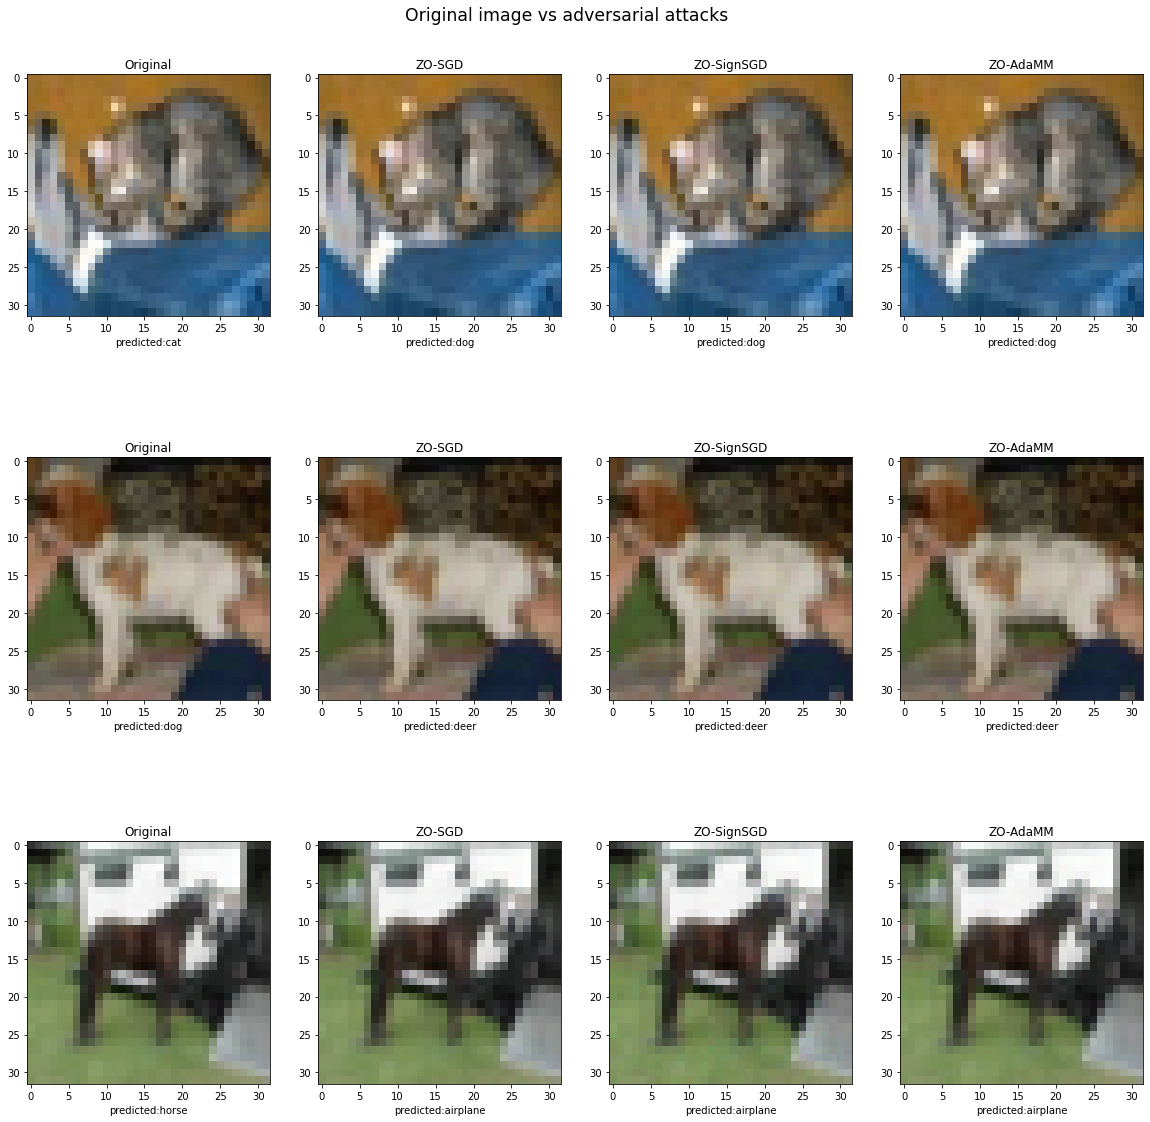

In [351]:
# for successfully converged images
images = [original_images,succ_adv_images_sgd, succ_adv_images_signsgd, succ_adv_images_adam]
labels = ["Original", "ZO-SGD", "ZO-SignSGD", "ZO-AdaMM"]
f, axarr = plt.subplots(3,4,figsize=(20,20))
succ_images = [3,4,5]
# Display the image
f.suptitle('Original image vs adversarial attacks', y=0.9, fontsize = "xx-large")
for img in range(len(images)):
  for i in range(len(succ_images)):
    pred = np.argmax(model.predict(images[img][succ_images[i]].reshape(1,32,32,3)))
    image = np.interp(images[img][succ_images[i]], (-0.5, 0.5), (0, 255))
    image = image.reshape(32,32,3)
    axarr[i][img].imshow((image).astype(np.uint8))
    axarr[i][img].set_title(labels[img])
    axarr[i][img].set_xlabel(f"predicted:{class_names[pred]}")


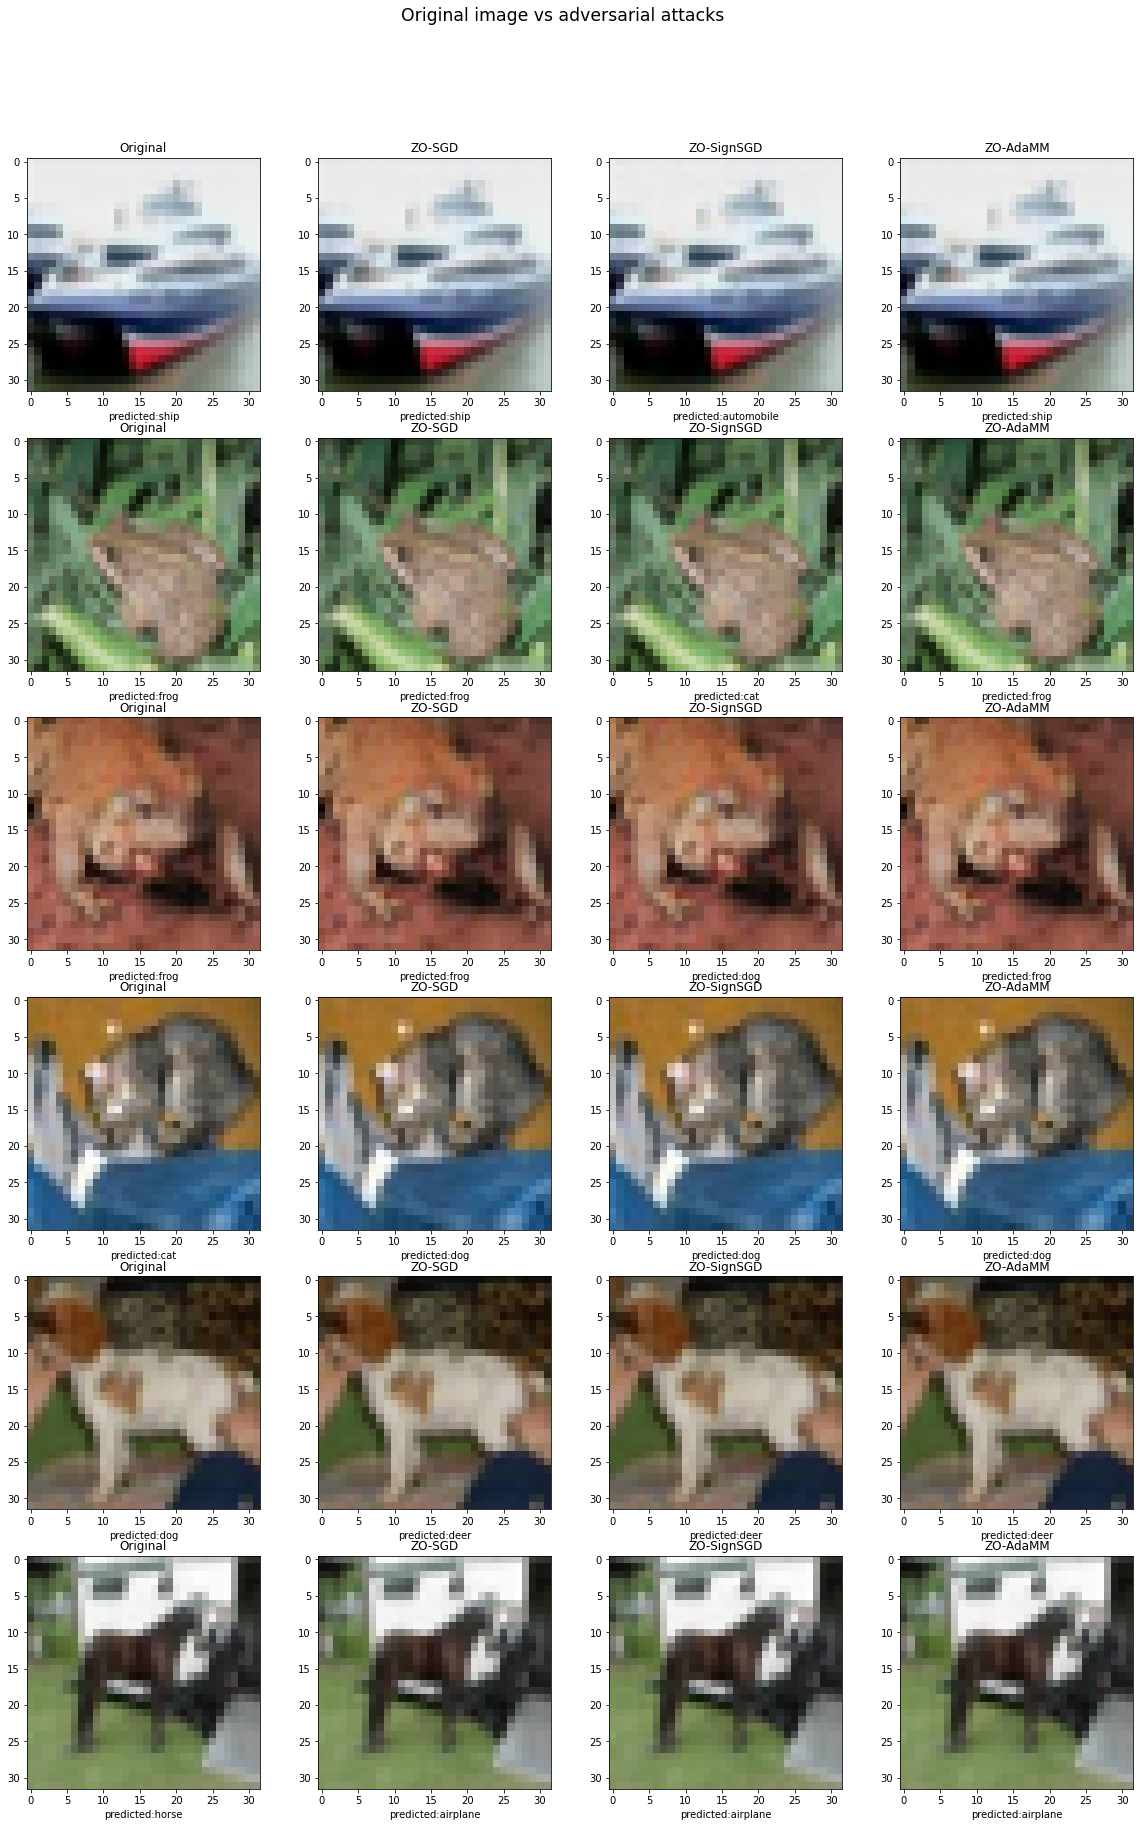

In [362]:
# for final adversarial images
images = [original_images,final_adv_image_sgd, final_adv_image_signsgd, final_adv_image_adam]
labels = ["Original", "ZO-SGD", "ZO-SignSGD", "ZO-AdaMM"]
f, axarr = plt.subplots(6,4,figsize=(20,30))

# Display the image
f.suptitle('Original image vs adversarial attacks', y=0.95, fontsize = "xx-large")
for img in range(len(images)):
  for i in range(len(original_images)):
    pred = np.argmax(model.predict(images[img][i].reshape(1,32,32,3)))
    image = np.interp(images[img][i], (-0.5, 0.5), (0, 255))
    image = image.reshape(32,32,3)
    axarr[i][img].imshow((image).astype(np.uint8))
    axarr[i][img].set_title(labels[img])
    axarr[i][img].set_xlabel(f"predicted:{class_names[pred]}")

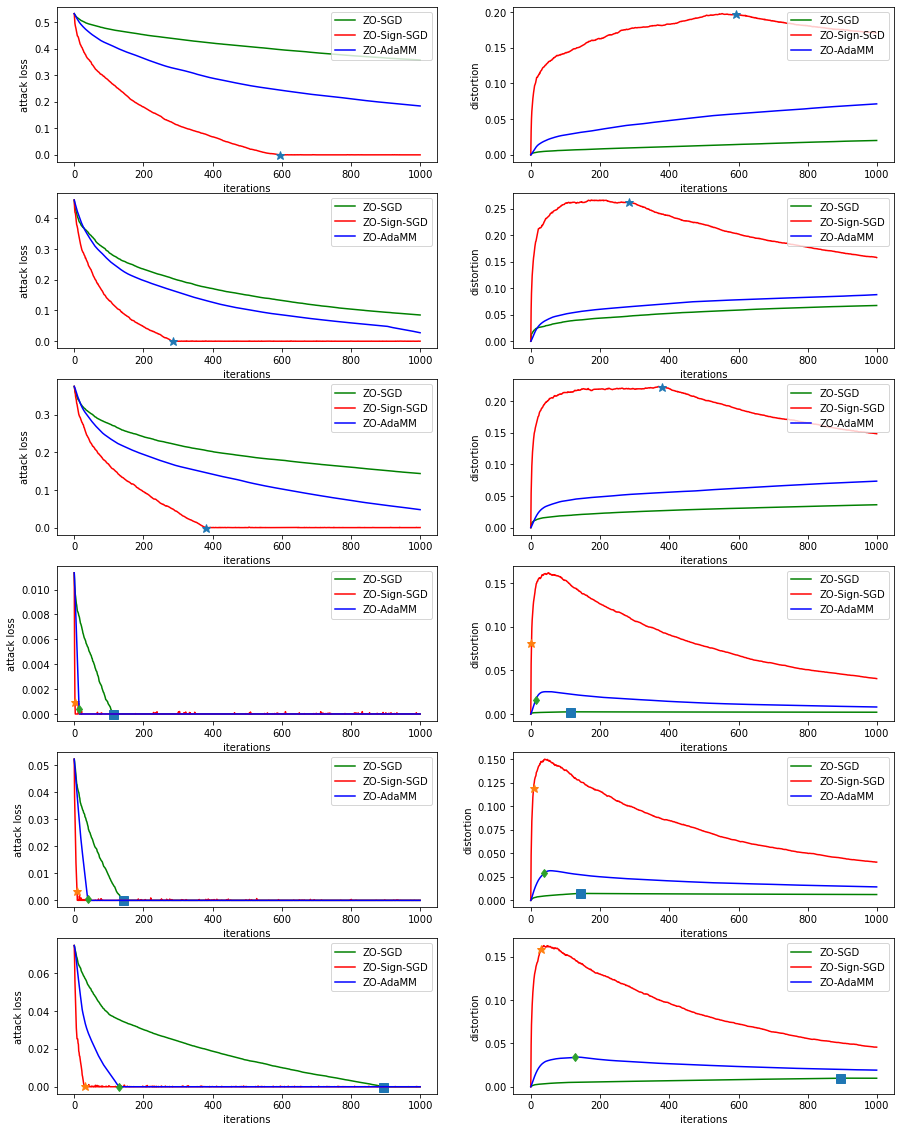

In [229]:
#attack loss and distortions plots for 5 images for all three ZO-methods
f, sub = plt.subplots(len(collect_idx),2,figsize=(15,20))
for i in range(len(collect_idx)):
  sub[i][0].plot(range(len(attack_losses_sgd[i])),attack_losses_sgd[i], 'g', label='ZO-SGD')
  if succ_iter_number_sgd[i] != None:
    sub[i][0].plot(succ_iter_number_sgd[i], attack_losses_sgd[i][succ_iter_number_sgd[i]], marker = "s", markersize= 9)
    
  sub[i][0].plot(range(len(attack_losses_signsgd[i])),attack_losses_signsgd[i], 'r', label='ZO-Sign-SGD')
  if succ_iter_number_signsgd[i] != None:
    sub[i][0].plot(succ_iter_number_signsgd[i], attack_losses_signsgd[i][succ_iter_number_signsgd[i]], marker = "*", markersize= 9)
    
  sub[i][0].plot(range(len(attack_losses_adam[i])),attack_losses_adam[i], 'b', label='ZO-AdaMM')
  if succ_iter_number_adam[i] != None:
    sub[i][0].plot(succ_iter_number_adam[i], attack_losses_adam[i][succ_iter_number_adam[i]], marker = "d")
    
  sub[i][0].legend(loc="upper right")
  sub[i][0].set_xlabel('iterations')
  sub[i][0].set_ylabel('attack loss')

  sub[i][1].plot(range(len(all_distortions_sgd[i])),all_distortions_sgd[i], 'g', label='ZO-SGD')
  if succ_iter_number_sgd[i] != None:
    sub[i][1].plot(succ_iter_number_sgd[i], all_distortions_sgd[i][succ_iter_number_sgd[i]], marker = "s", markersize= 9)
    
  sub[i][1].plot(range(len(all_distortions_signsgd[i])),all_distortions_signsgd[i], 'r', label='ZO-Sign-SGD')
  if succ_iter_number_signsgd[i] != None:
    sub[i][1].plot(succ_iter_number_signsgd[i], all_distortions_signsgd[i][succ_iter_number_signsgd[i]], marker = "*", markersize= 9)
    
  sub[i][1].plot(range(len(all_distortions_adam[i])),all_distortions_adam[i], 'b', label='ZO-AdaMM')
  if succ_iter_number_adam[i] != None:
    sub[i][1].plot(succ_iter_number_adam[i], all_distortions_adam[i][succ_iter_number_adam[i]], marker = "d")
    
  sub[i][1].legend(loc="upper right")
  sub[i][1].set_xlabel('iterations')
  _=sub[i][1].set_ylabel('distortion')





In [236]:
f.savefig("lossanddistortions.png")